In [1]:
import math
import numpy as np
import scipy
from scipy import sparse
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import matplotlib.pyplot as plt
from lib_p3 import *

In [2]:
T = 50  # simulation time in Myr
L = 1   # half length of the box
M = 50  # spacing in L
N = 500 # spacing in T

# CONSTANTS
KM = 1e3
# print('Km = ', KM, 'm')
PC = 3.086e16
# print('Pc = ', PC, 'm')
MYR = 1e6*365*24*60*60
# print('Myr = ', MYR, 's')

# Constants and parameters
eta_T = 4e-2
Omega = 150*MYR*KM/(1000*PC)
# print('Omega = ', Omega)
q = 0.98
alpha = 10*1e3*MYR/(100*PC)
# print('alpha = ', alpha)

dyn_num = -alpha*q*Omega*1**3/eta_T**2
print('Dynamo Number (D) = ', dyn_num)

Dynamo Number (D) =  -9.594419923313069


Example 1

In [3]:
#Initial Conditions 1
#'''
def init_cond_Br(z):
	return 1-(z)**2

def init_cond_Bphi(z):
	return np.cos(np.pi*(z)/2)**2
#'''


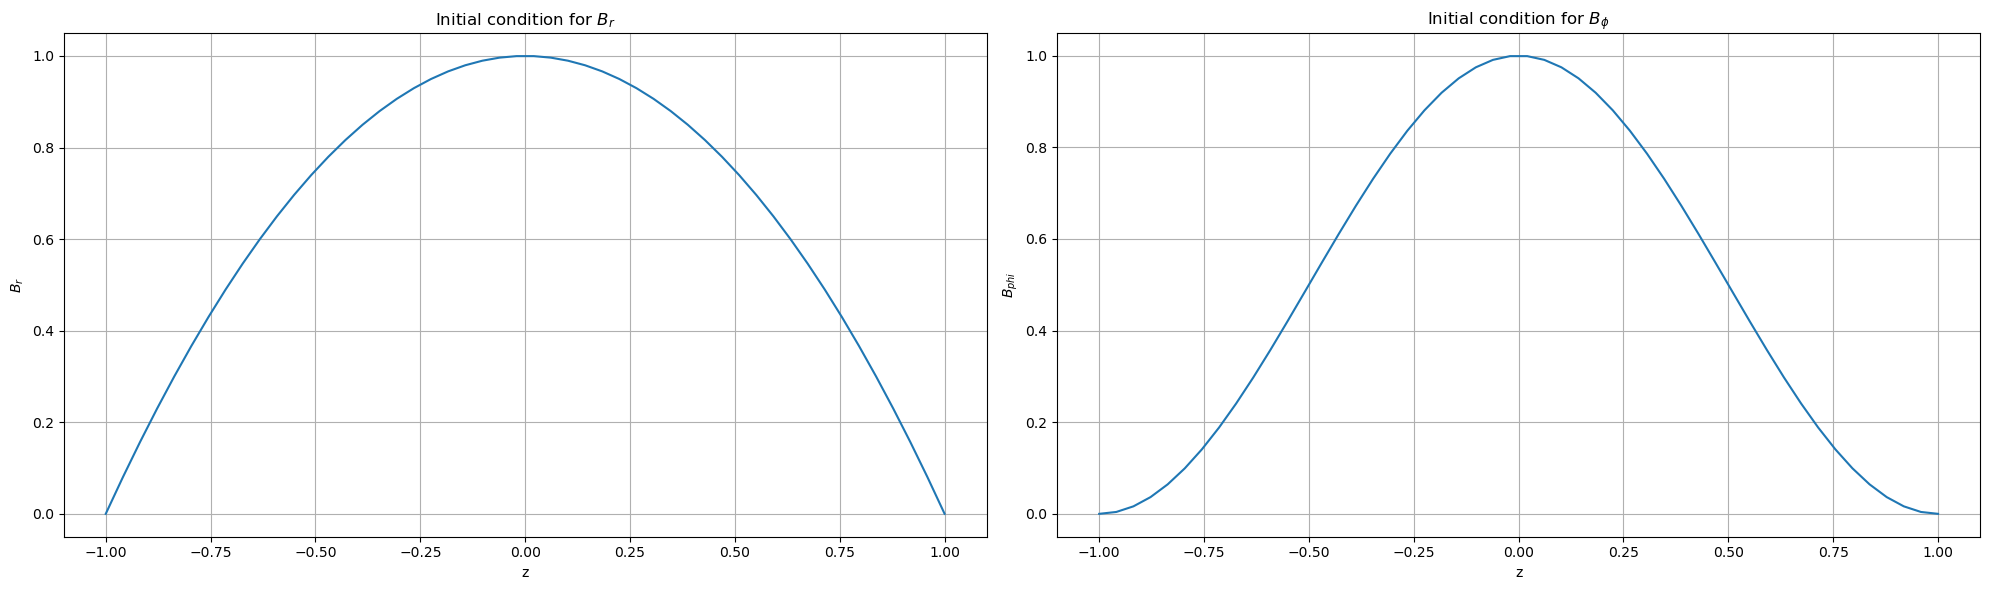

In [4]:
z = np.linspace(-L, L, M)
#print(z)
title_1 = 'Initial condition for $B_{r}$'
title_2 = 'Initial condition for $B_{\phi}$'

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


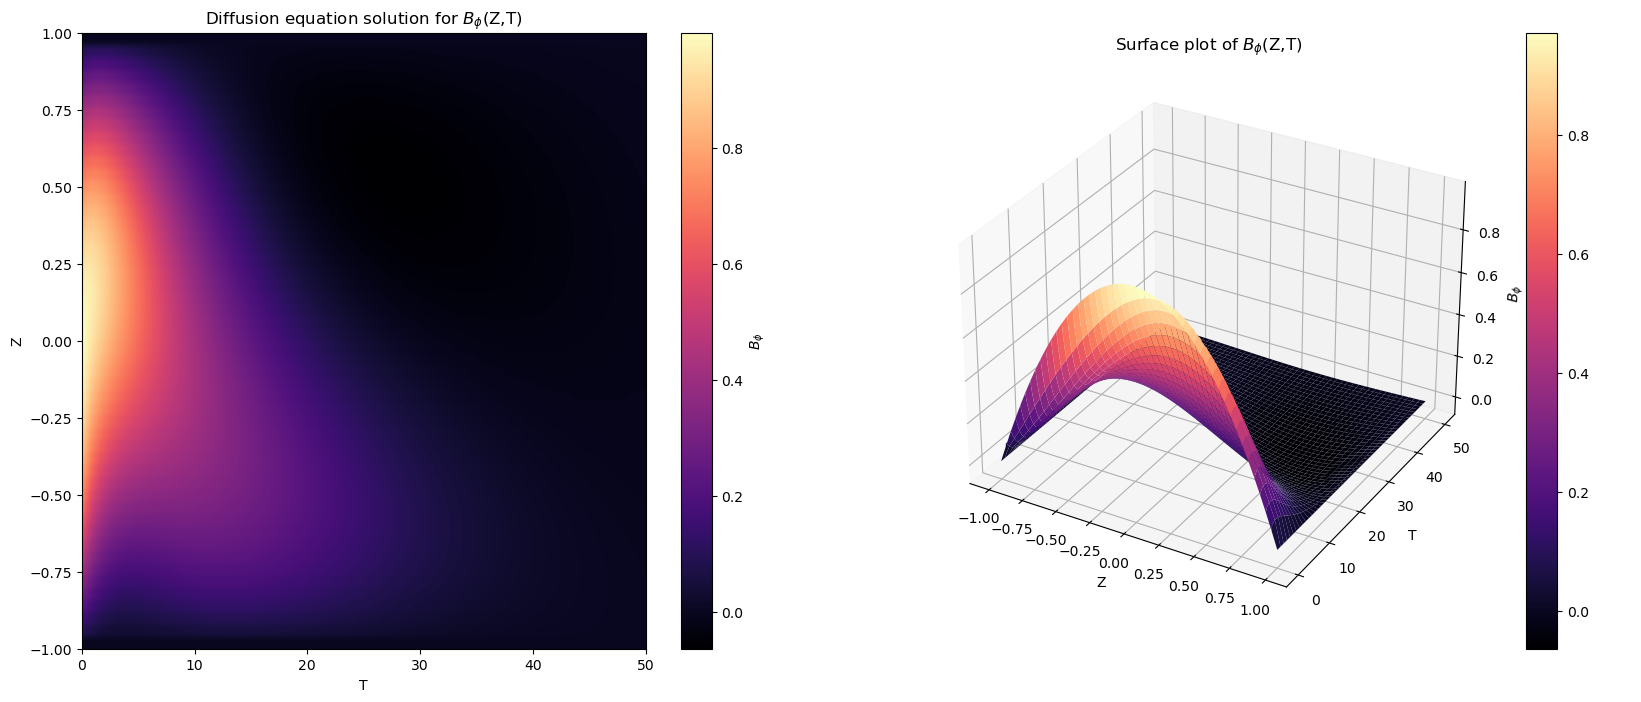

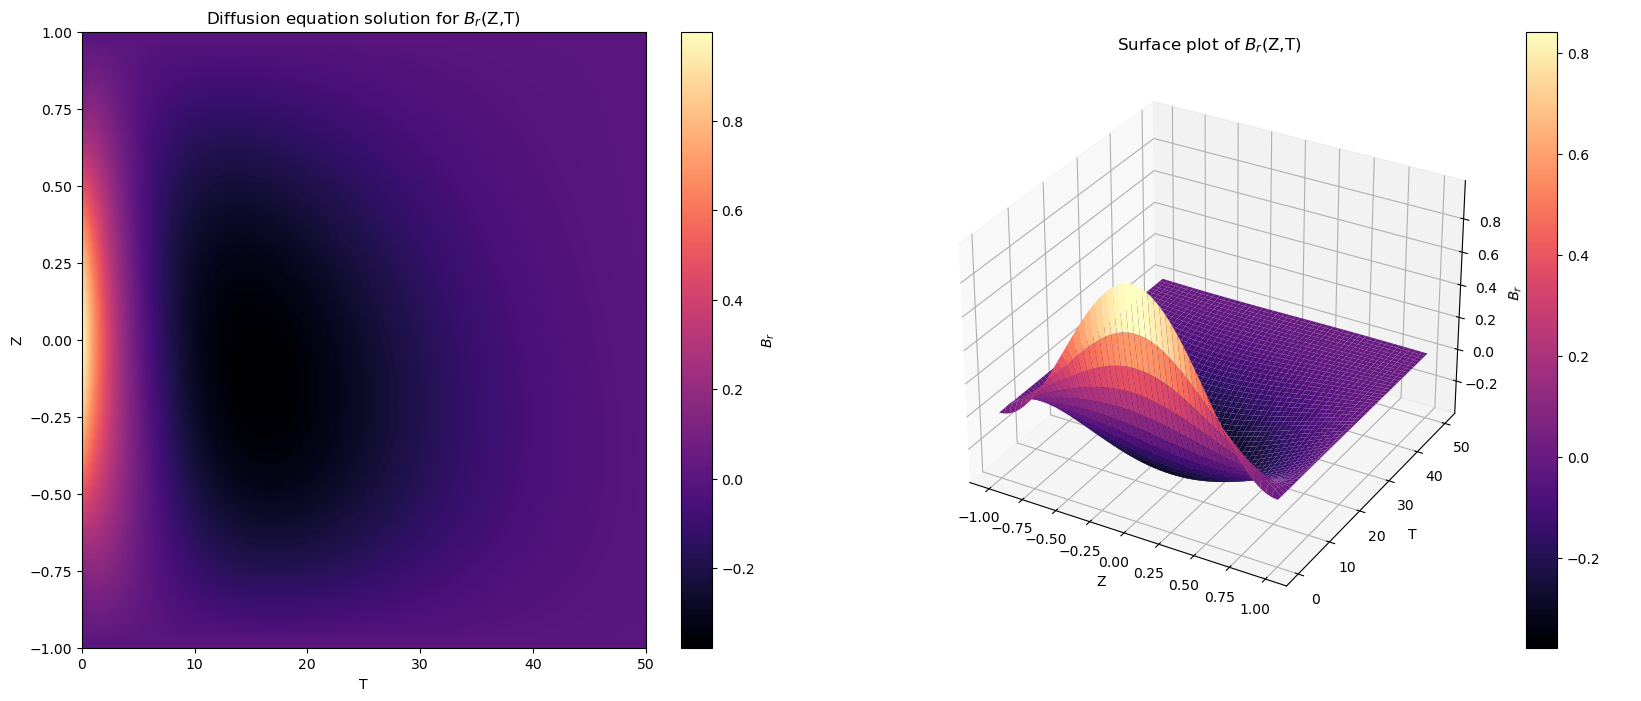

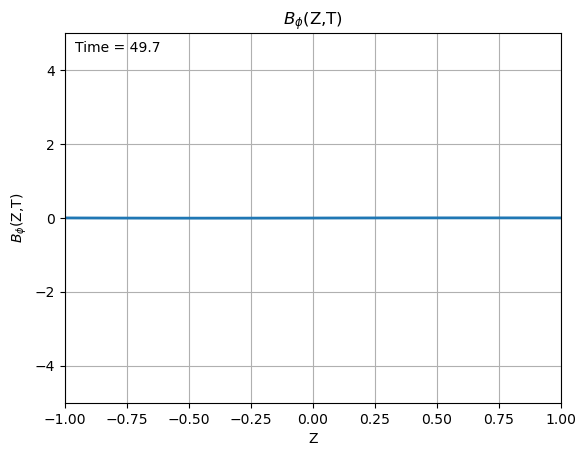

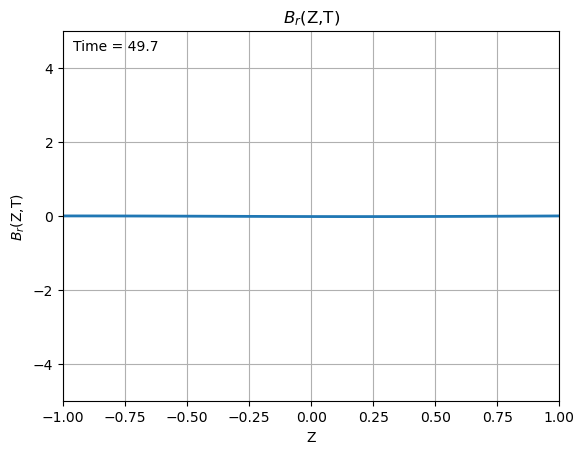

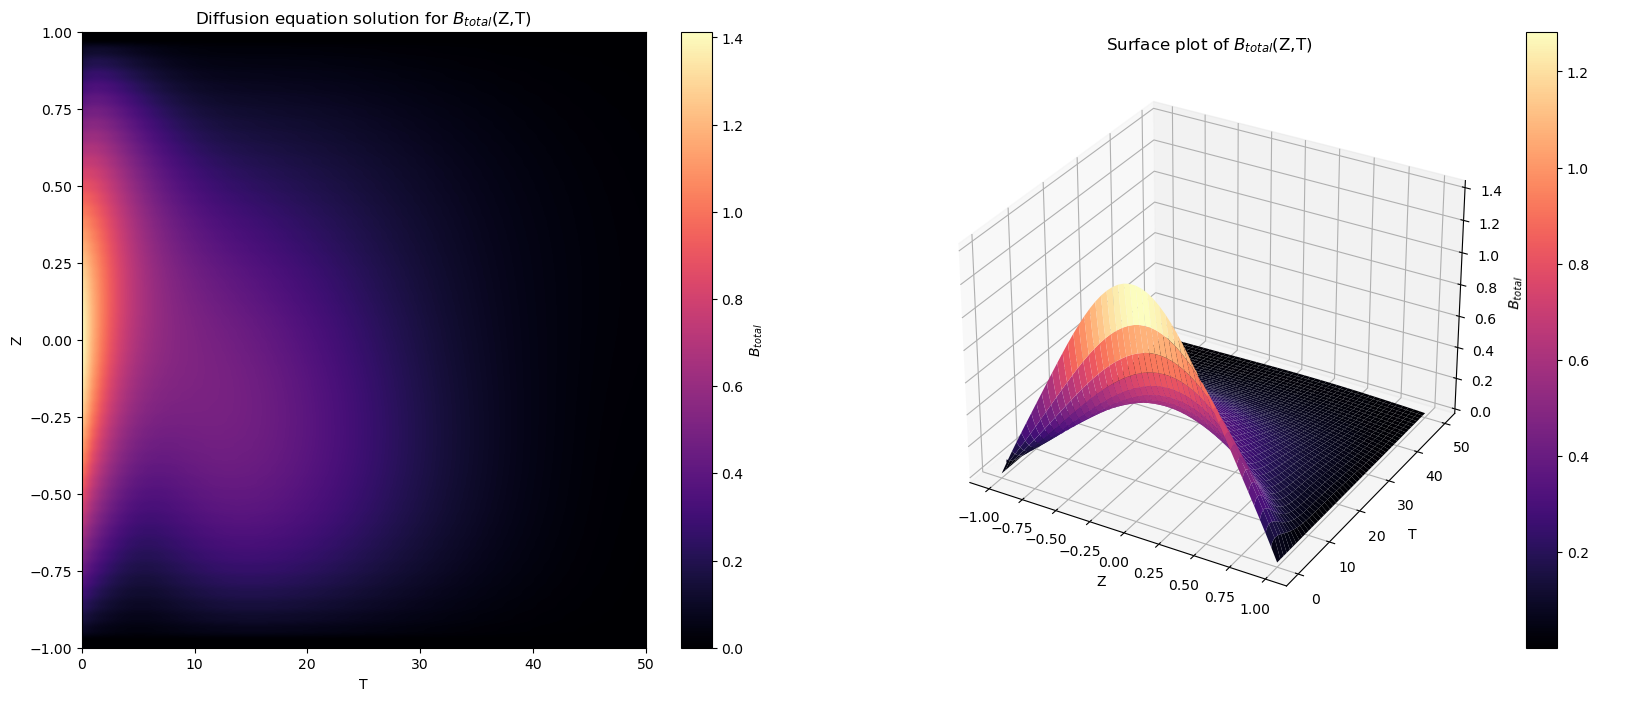

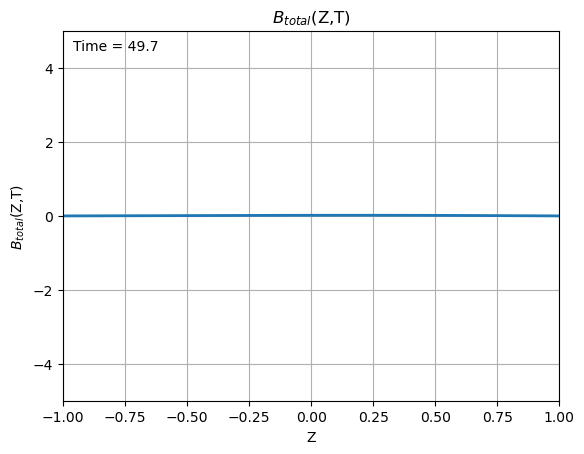

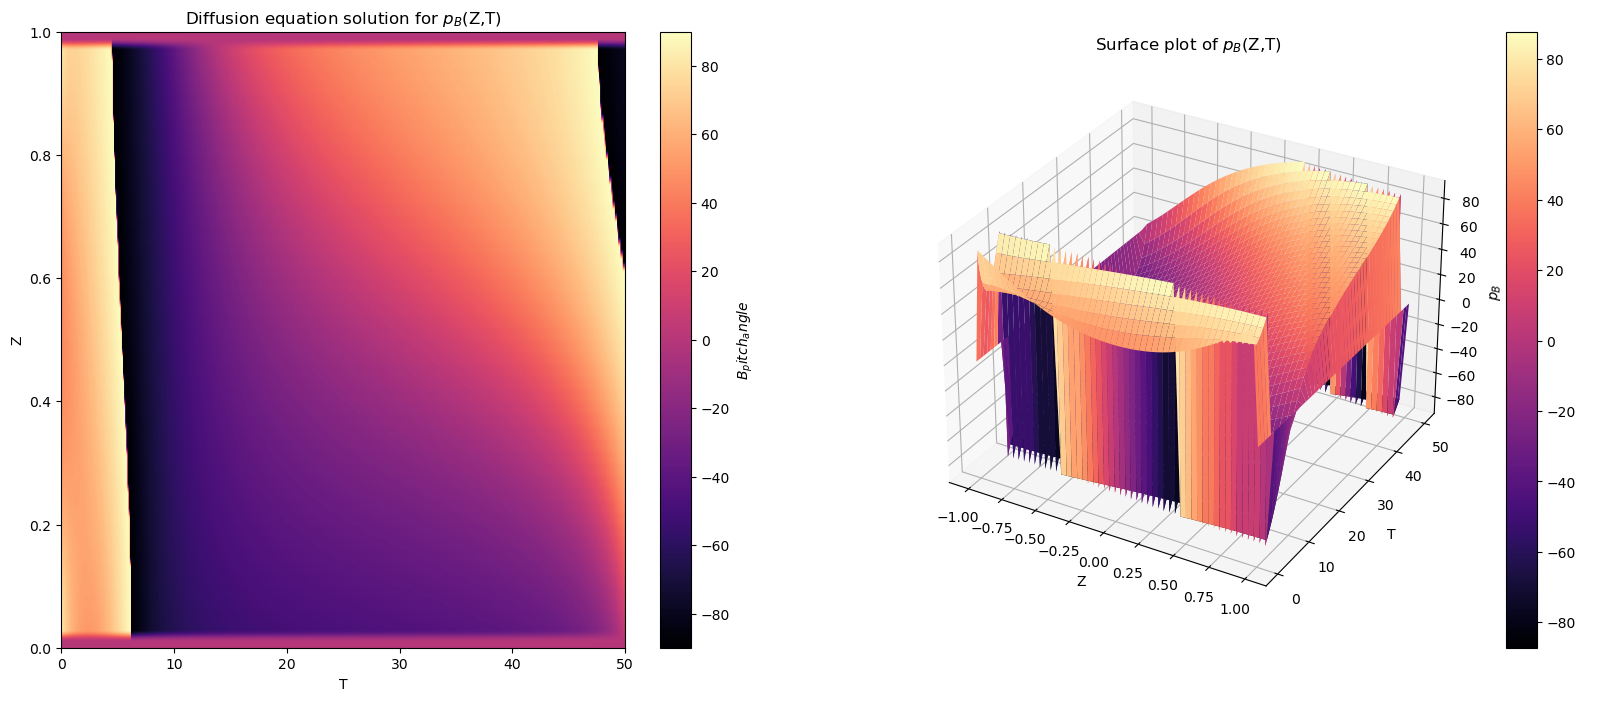

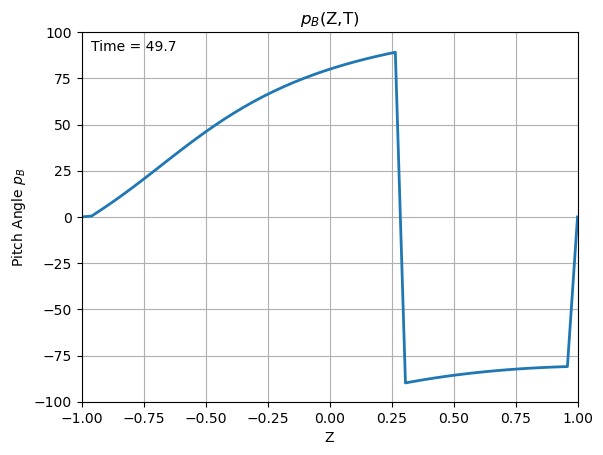

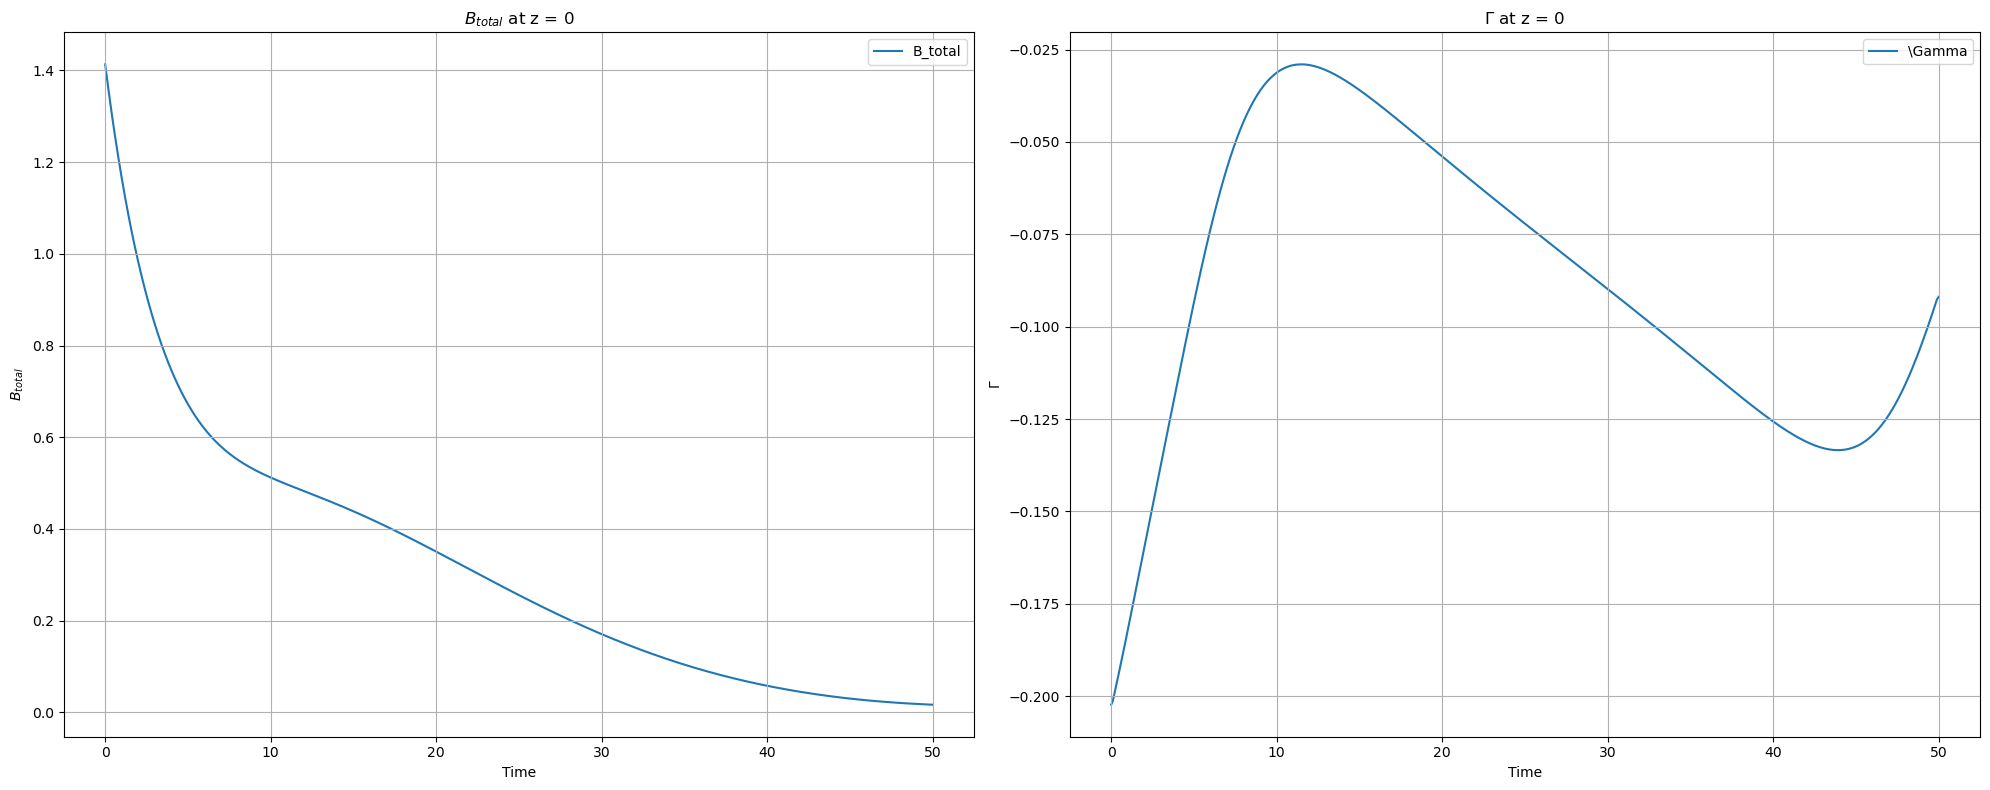

In [5]:
#a-omega ex1
#'''
U, tspan, xspan = crank_nicolson_mod_alpha_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B(U_r, tspan, xspan, T, L, '\phi')
plot_B(U_phi, tspan, xspan, T, L, 'r')
plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','1_alpha_omega')
plot_B_animation(U_r, tspan, xspan, T, L, 'r','1_alpha_omega')

B_total0 = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total0, tspan, xspan, T, L, '{total}')
plot_B_animation(B_total0, tspan, xspan, T, L, '{total}','1_alpha_omega')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle', '1_alpha_omega')
#'''

B_mid = B_total0[int(M/2),:]

# Create a figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot B_total
axs[0].plot(tspan, B_mid, label='B_total', zorder = 1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('$B_{total}$')
axs[0].set_title('$B_{total}$ at z = 0')
axs[0].legend()
axs[0].grid(True)  # Add grid

# Calculate decay rate
decay_rate = np.gradient(np.log(B_mid), tspan)

# Plot decay rate
axs[1].plot(tspan, decay_rate, label='\Gamma', zorder = 1)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$\Gamma$')
axs[1].set_title('$\Gamma$ at z = 0')
axs[1].legend()
axs[1].grid(True)  # Add grid

# Display the plot
plt.tight_layout()
plt.show()

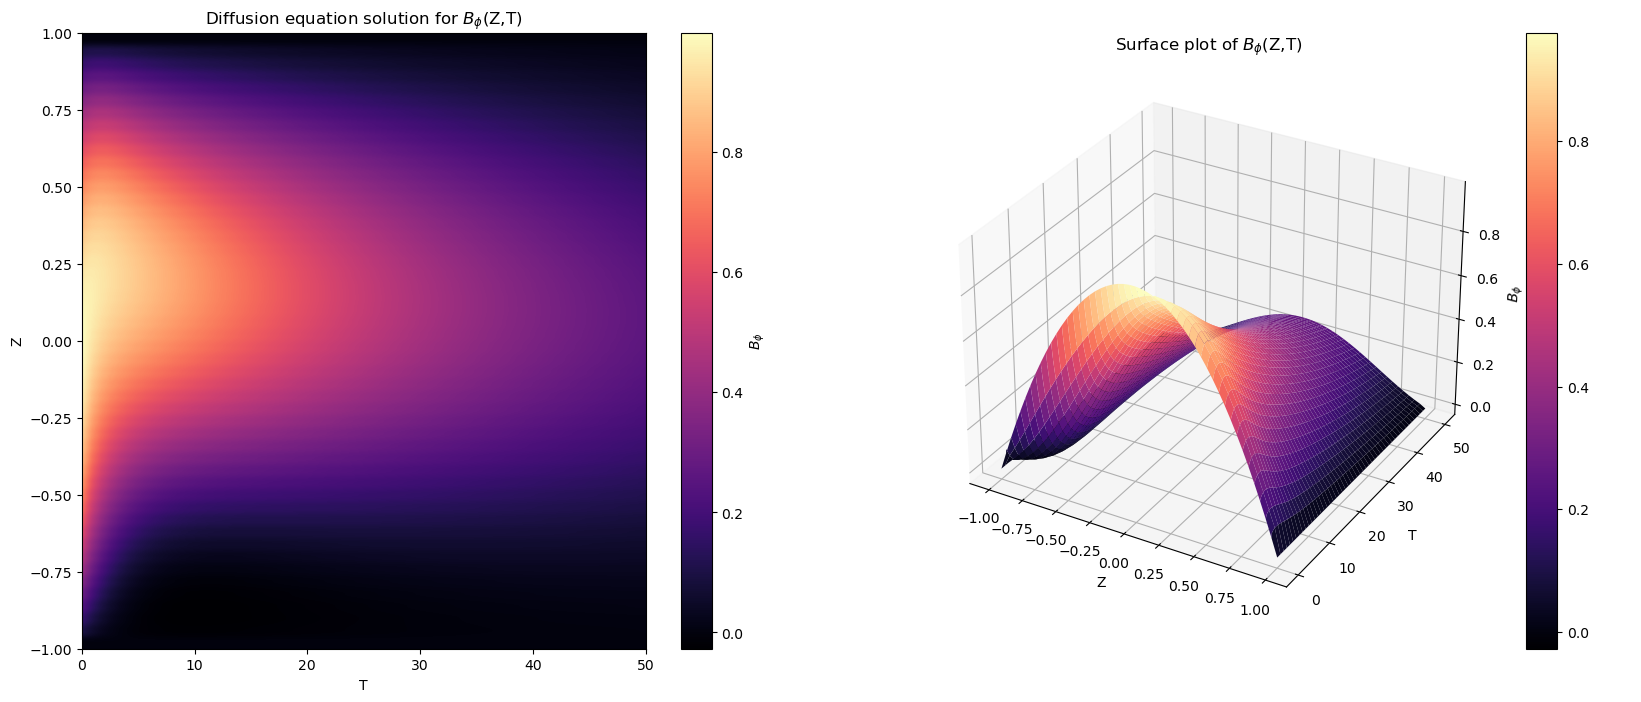

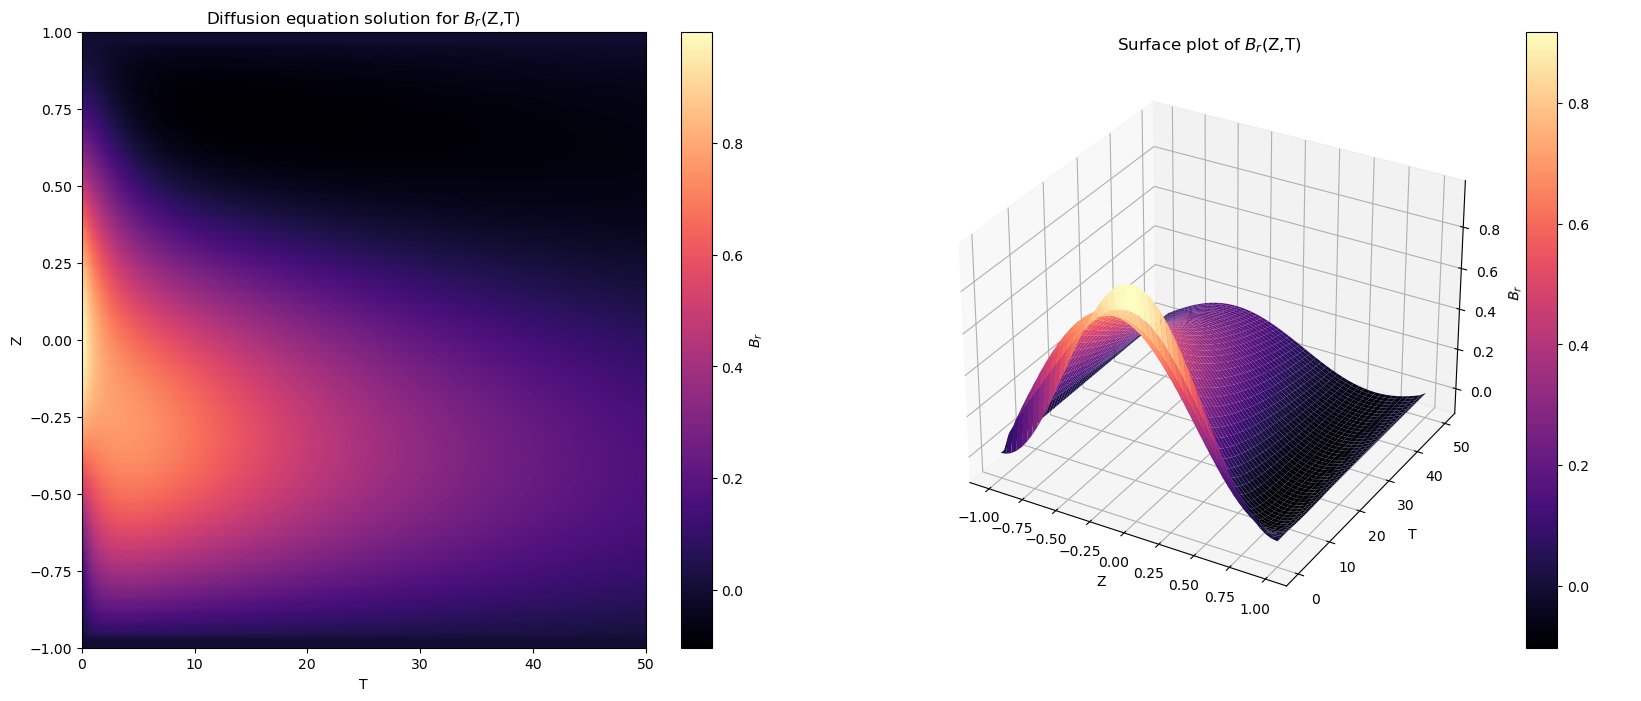

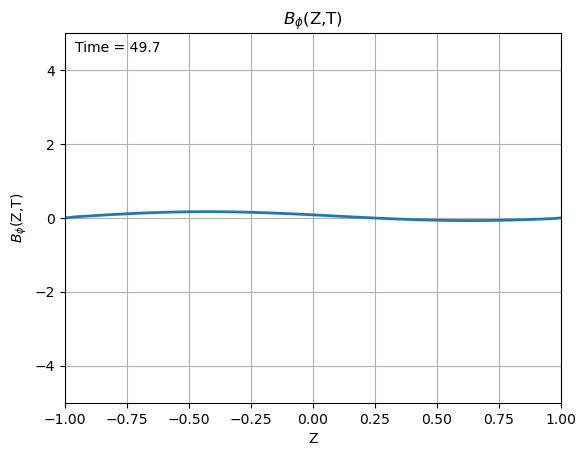

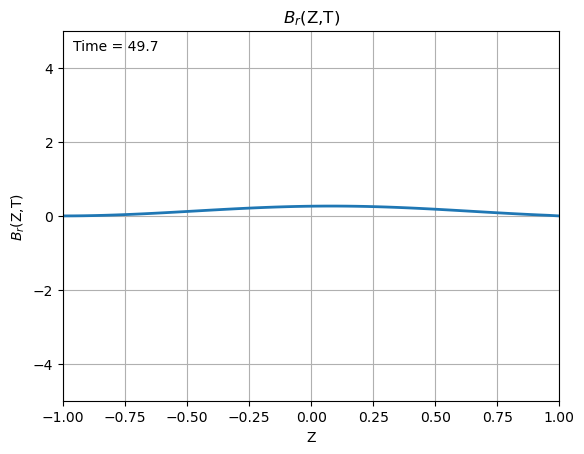

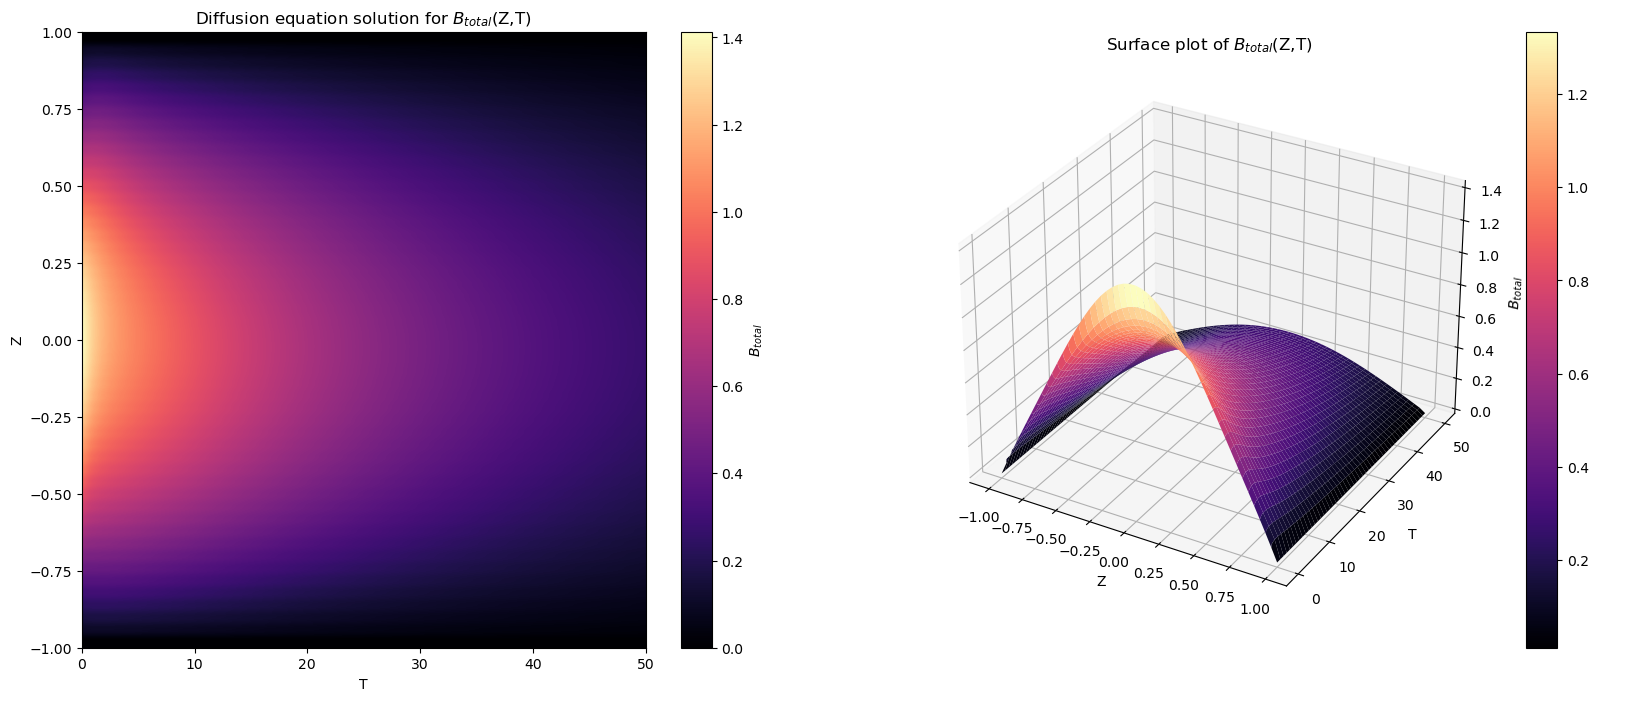

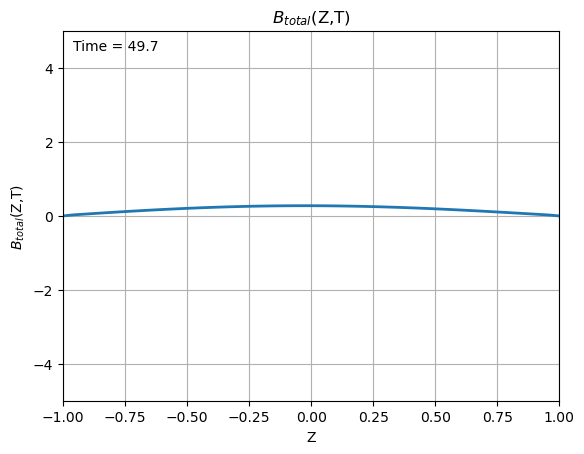

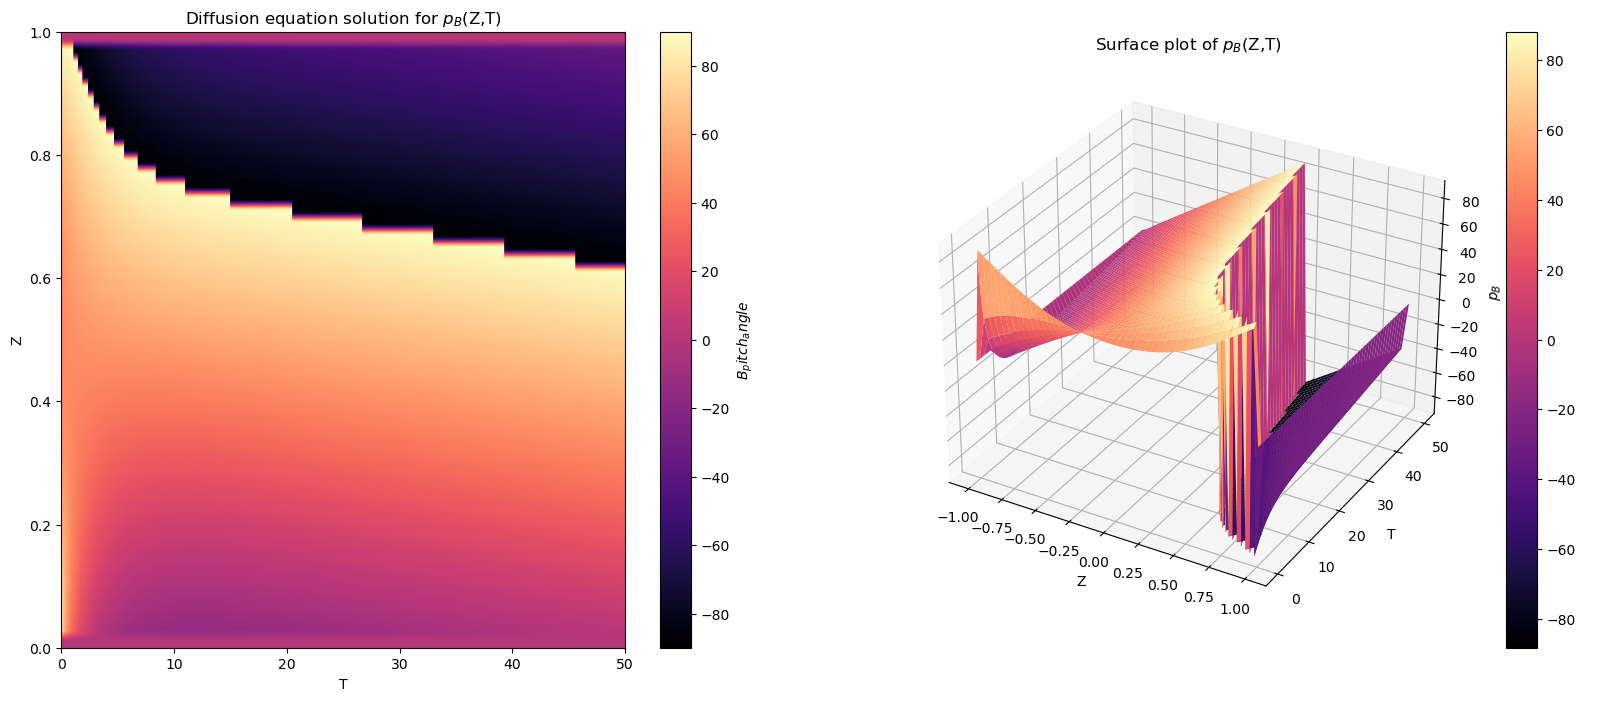

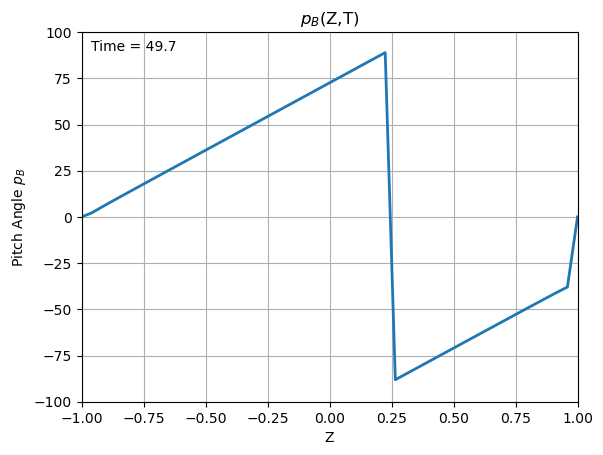

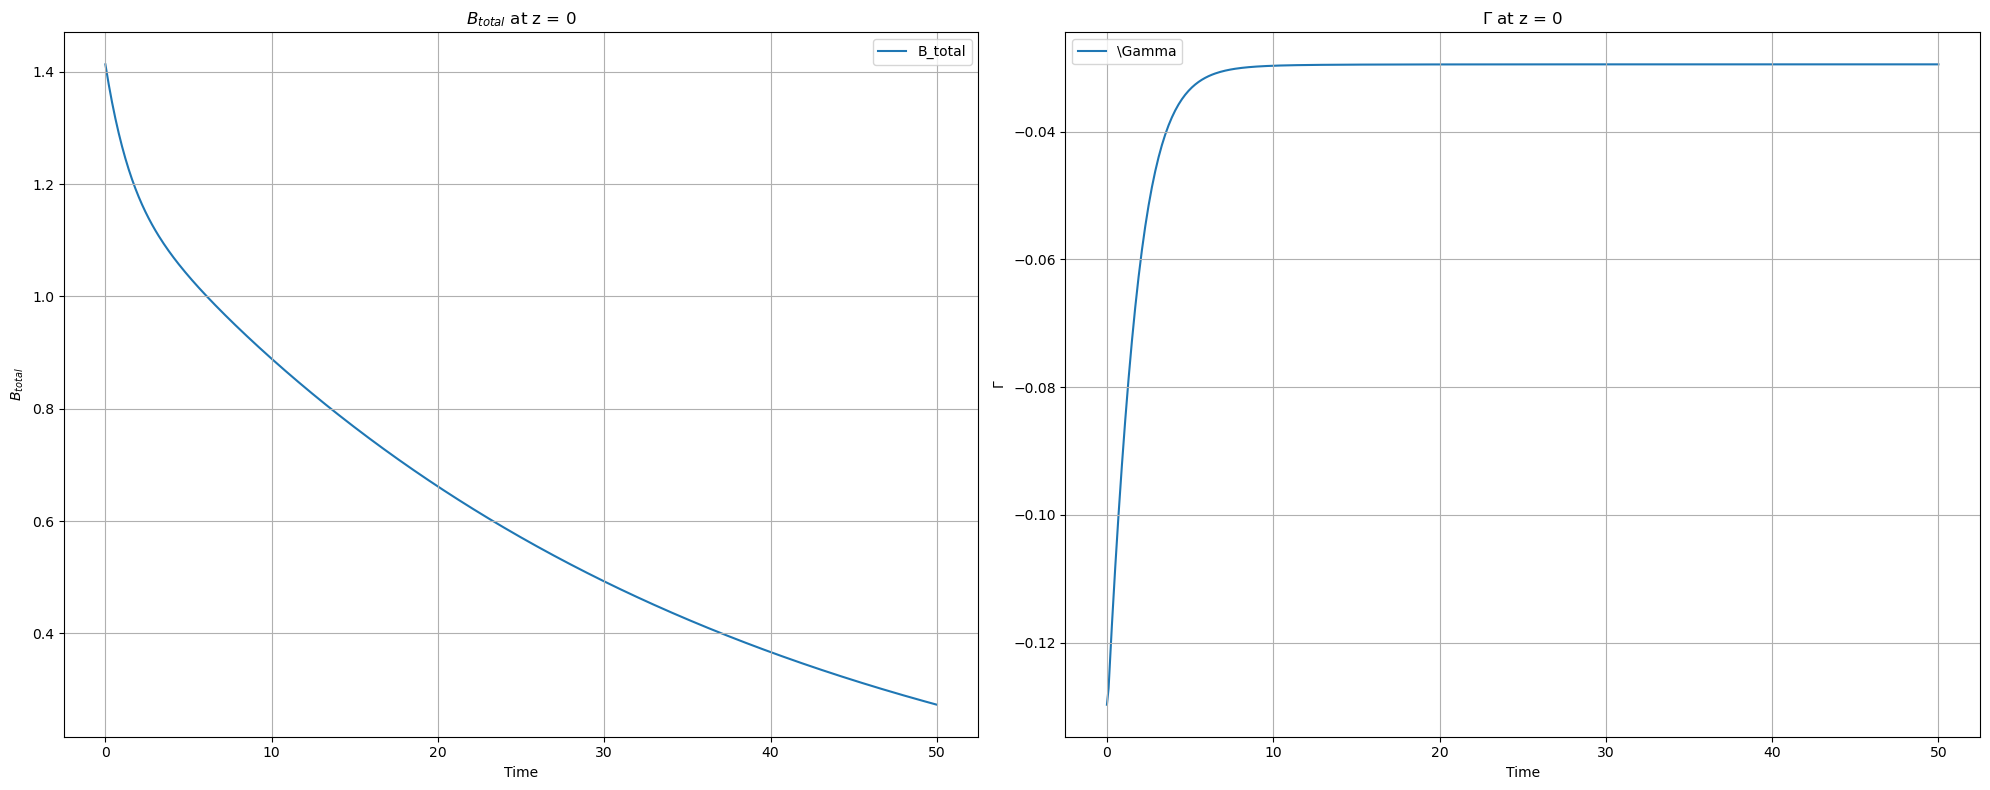

In [6]:
#a2-omega ex1
U, tspan, xspan = crank_nicolson_mod_alpha2_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B(U_r, tspan, xspan, T, L, '\phi')
plot_B(U_phi, tspan, xspan, T, L, 'r')
plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','1_alpha2_omega')
plot_B_animation(U_r, tspan, xspan, T, L, 'r','1_alpha2_omega')

B_total1 = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total1, tspan, xspan, T, L, '{total}')
plot_B_animation(B_total1, tspan, xspan, T, L, '{total}','1_alpha2_omega')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle', '1_alpha2_omega')

B_mid = B_total1[int(M/2),:]

# Create a figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot B_total
axs[0].plot(tspan, B_mid, label='B_total', zorder = 1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('$B_{total}$')
axs[0].set_title('$B_{total}$ at z = 0')
axs[0].legend()
axs[0].grid(True)  # Add grid

# Calculate decay rate
decay_rate = np.gradient(np.log(B_mid), tspan)

# Plot decay rate
axs[1].plot(tspan, decay_rate, label='\Gamma', zorder = 1)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$\Gamma$')
axs[1].set_title('$\Gamma$ at z = 0')
axs[1].legend()
axs[1].grid(True)  # Add grid

# Display the plot
plt.tight_layout()
plt.show()

Calculating critical Dynamo number...
Critical Dynamo number Dc =  -11.5789
Value of alpha at D_c = -12.0684 km/s


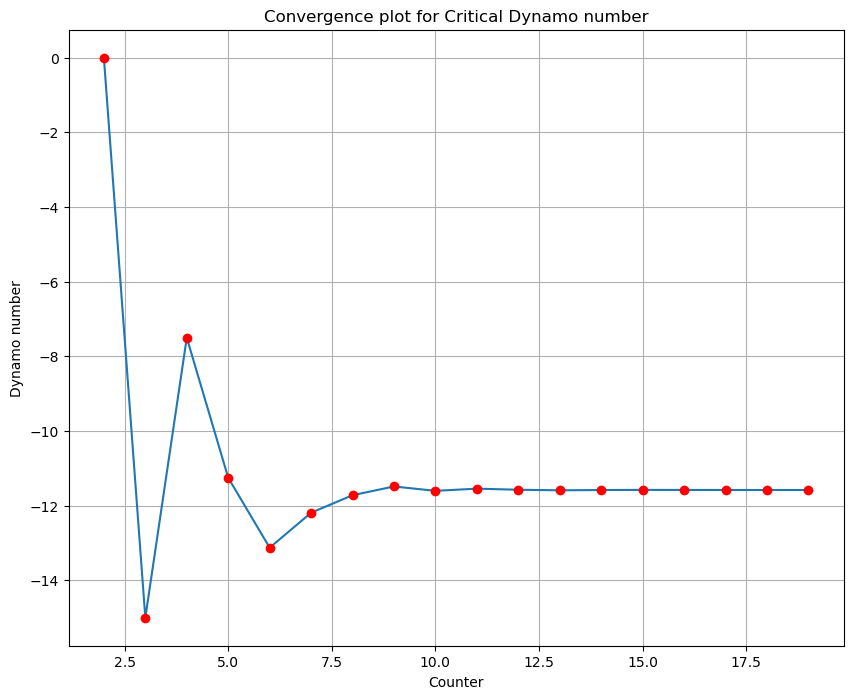

In [7]:
def f(D):
	alpha = D/(q*Omega*1**3/eta_T**2)
	z = np.linspace(-L, L, M)
	# Solve the diffusion equation in radial direction
	U, tspan, xspan = crank_nicolson_mod_alpha2_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

	B_r = U[:len(z), :]
	B_phi = U[len(z):, :]

	B_total = np.sqrt(B_phi**2 + B_r**2)
	B_mid = np.log(B_total[int(M/2),:])

	#decay_rate = get_decay_rate(tspan, B_mid, do_print=False)
	decay_rate = np.gradient(B_mid, tspan)

	return decay_rate[-1]

print('Calculating critical Dynamo number...')
D_c, x_arr, y_arr = bisection(f, -30, 30, eps=1e-6)
print('Critical Dynamo number Dc = ', np.round(D_c, 4))
print('Value of alpha at D_c =', np.round(D_c/(q*Omega*1**3/eta_T**2)/(1e3*MYR/(100*PC)), 4), 'km/s')

plt.figure(figsize=(10, 8))
plt.plot(x_arr, y_arr)
plt.plot(x_arr, y_arr, 'ro')
plt.xlabel('Counter')
plt.ylabel('Dynamo number')
plt.title('Convergence plot for Critical Dynamo number')
plt.grid()

plt.show()

Example 2

In [8]:
#Initial Conditions 1
#'''
def init_cond_Br(z):
	return 1-(z)**2

def init_cond_Bphi(z):
	return (z)**2 -1
#'''

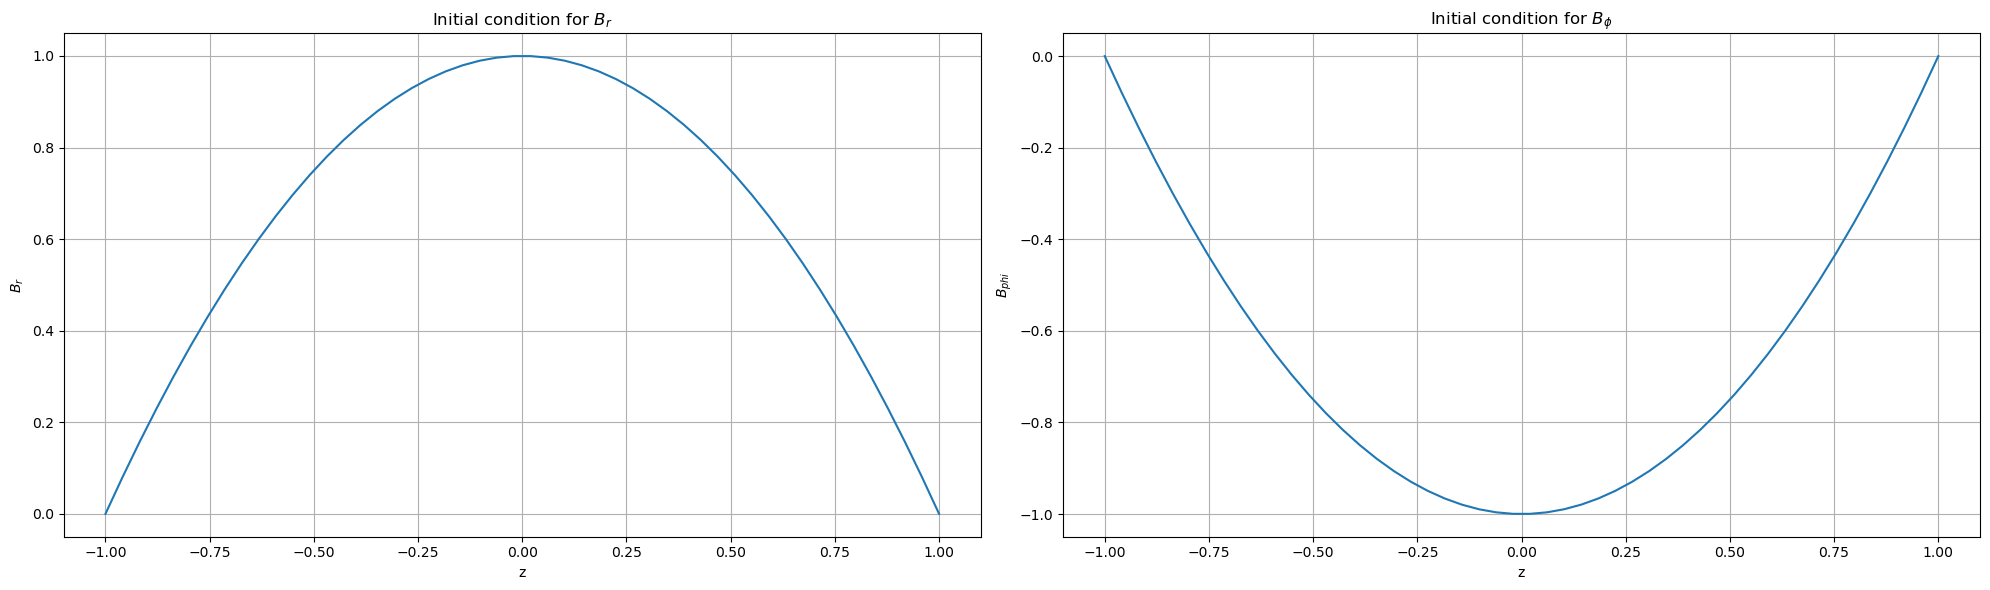

In [9]:
z = np.linspace(-L, L, M)
#print(z)
title_1 = 'Initial condition for $B_{r}$'
title_2 = 'Initial condition for $B_{\phi}$'

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()

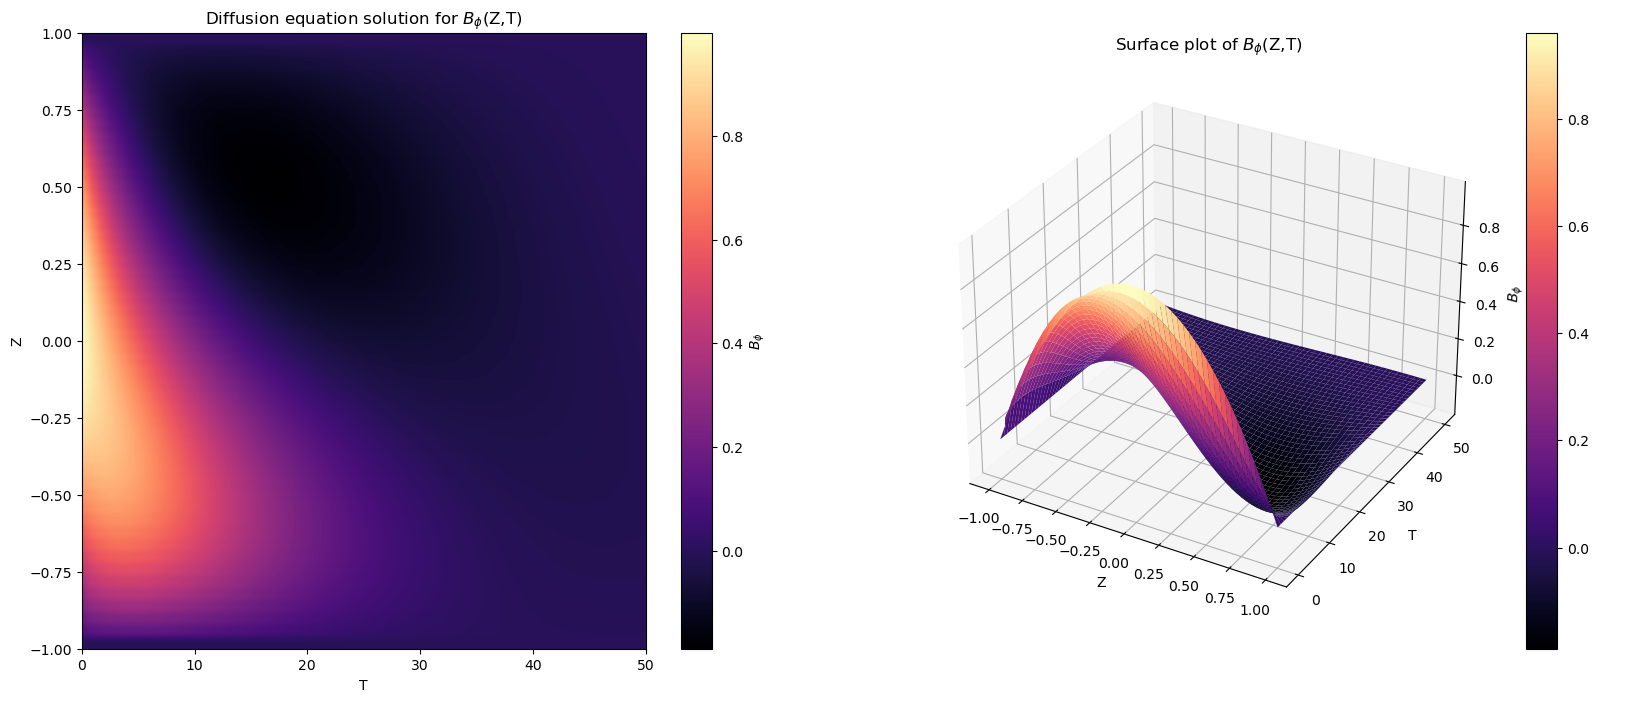

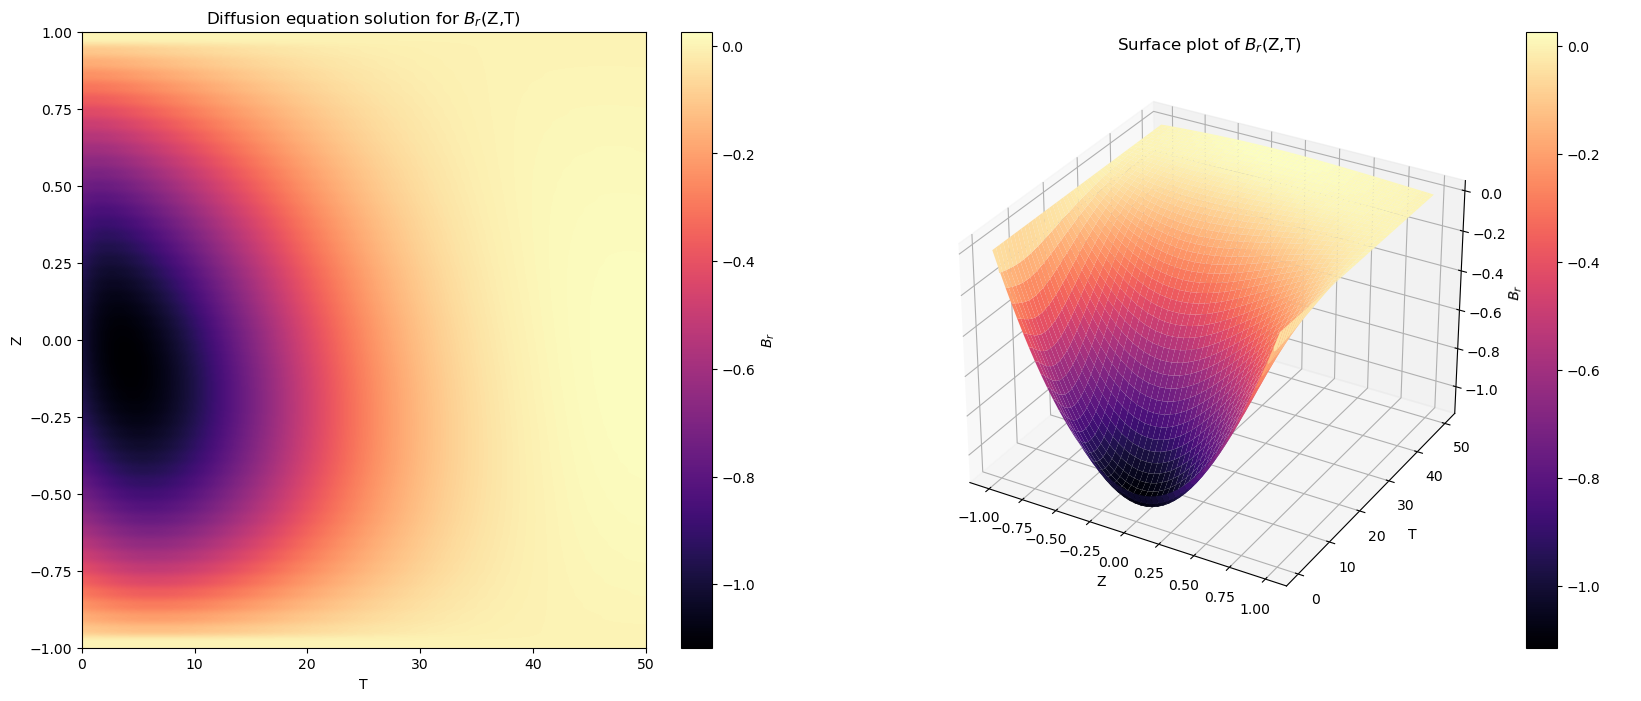

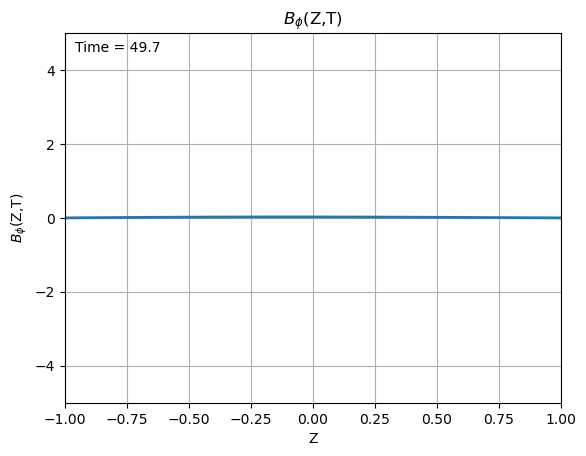

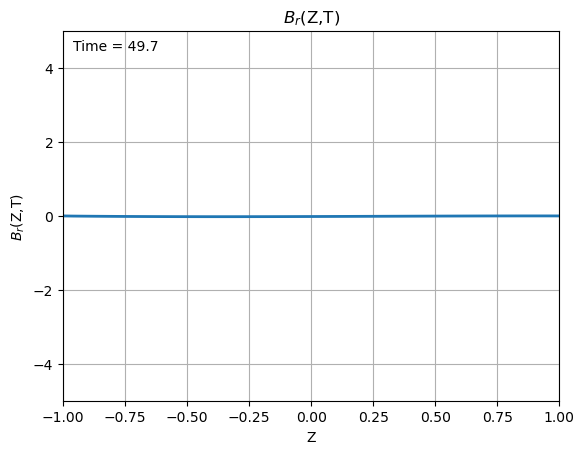

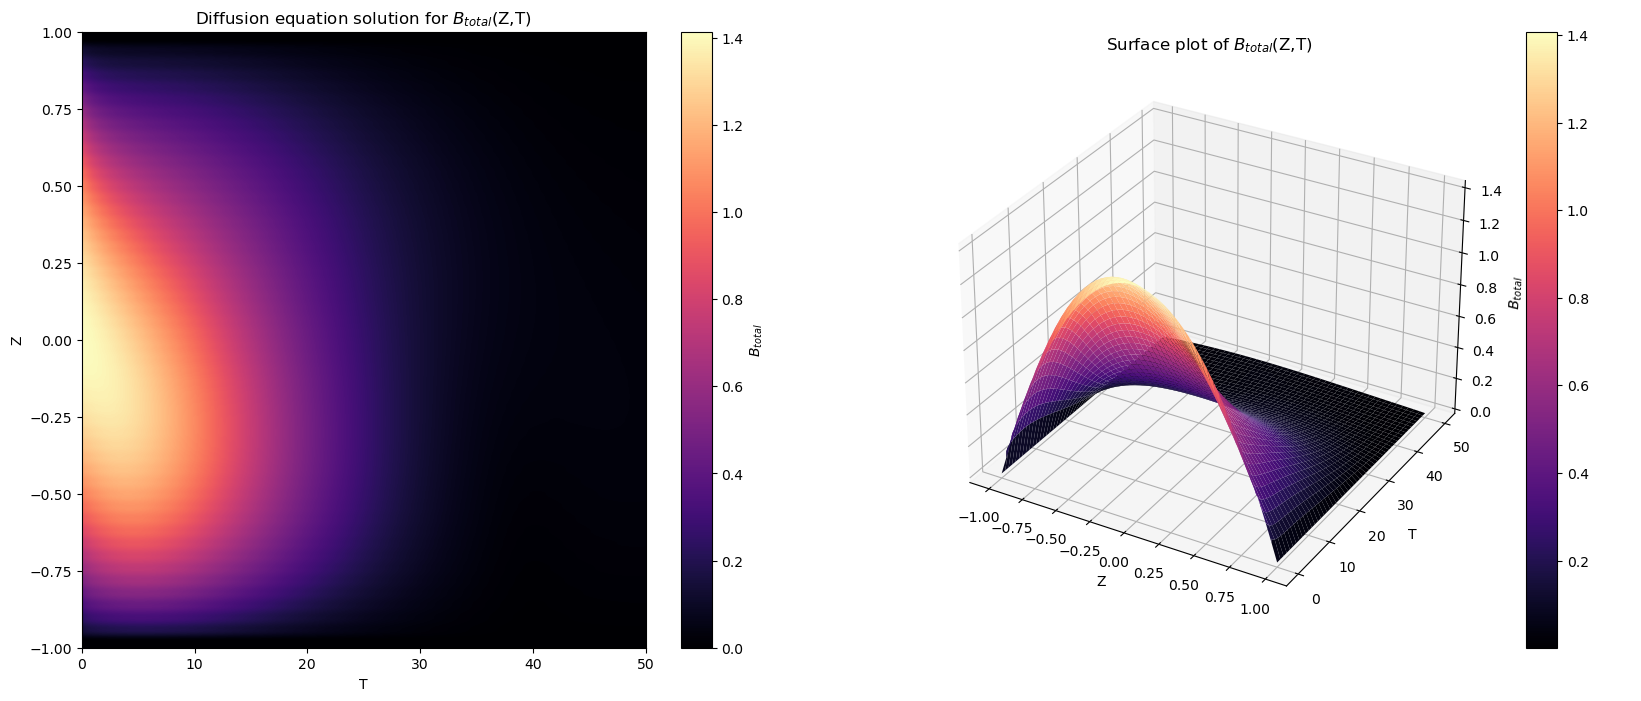

/tmp/ipykernel_31259/3402130583.py:18: RuntimeWarning: invalid value encountered in divide
  pitch_angle = np.degrees(np.arctan(U_r/U_phi))


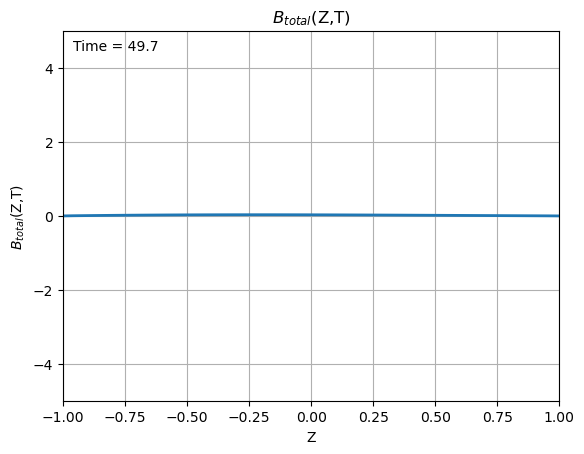

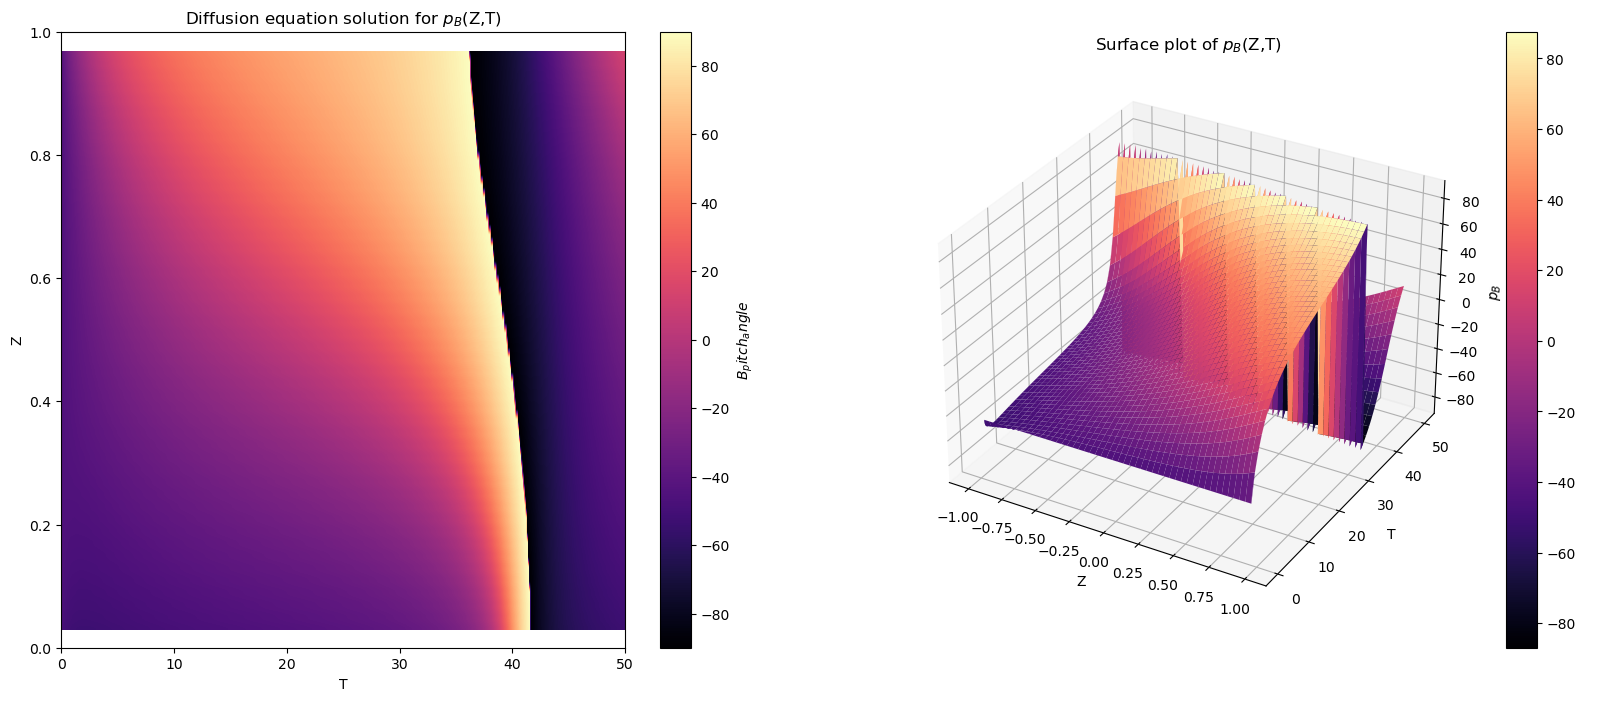

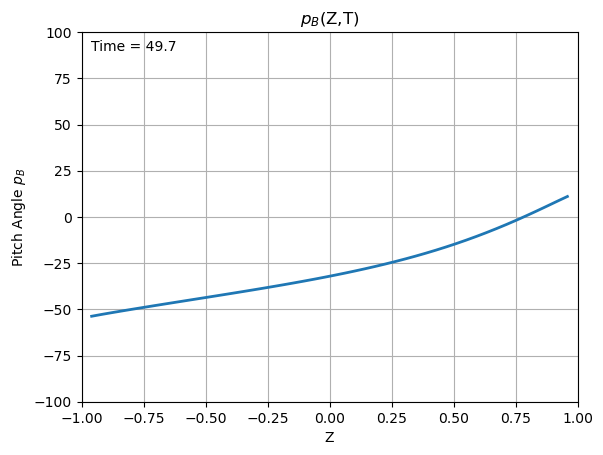

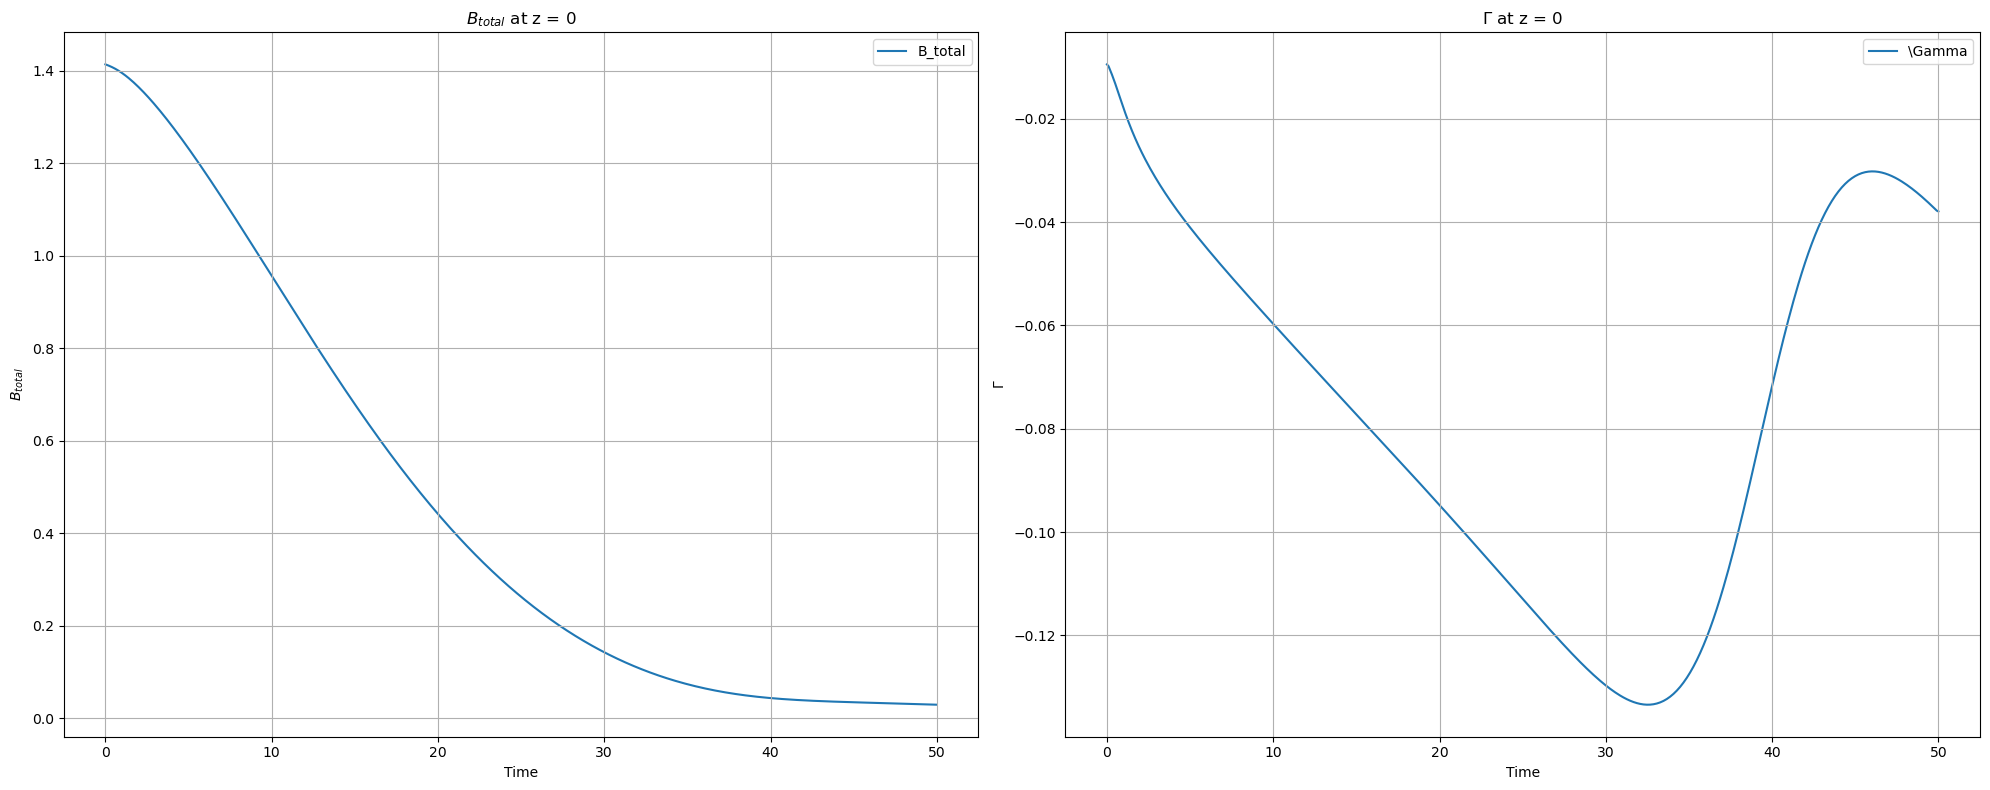

In [13]:
#a-omega ex2
#'''
U, tspan, xspan = crank_nicolson_mod_alpha_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B(U_r, tspan, xspan, T, L, '\phi')
plot_B(U_phi, tspan, xspan, T, L, 'r')
plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','2_alpha_omega')
plot_B_animation(U_r, tspan, xspan, T, L, 'r','2_alpha_omega')

B_total0 = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total0, tspan, xspan, T, L, '{total}')
plot_B_animation(B_total0, tspan, xspan, T, L, '{total}','2_alpha_omega')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle', '2_alpha_omega')
#'''


B_mid = B_total0[int(M/2),:]

# Create a figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot B_total
axs[0].plot(tspan, B_mid, label='B_total', zorder = 1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('$B_{total}$')
axs[0].set_title('$B_{total}$ at z = 0')
axs[0].legend()
axs[0].grid(True)  # Add grid

# Calculate decay rate
decay_rate = np.gradient(np.log(B_mid), tspan)

# Plot decay rate
axs[1].plot(tspan, decay_rate, label='\Gamma', zorder = 1)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$\Gamma$')
axs[1].set_title('$\Gamma$ at z = 0')
axs[1].legend()
axs[1].grid(True)  # Add grid

# Display the plot
plt.tight_layout()
plt.show()

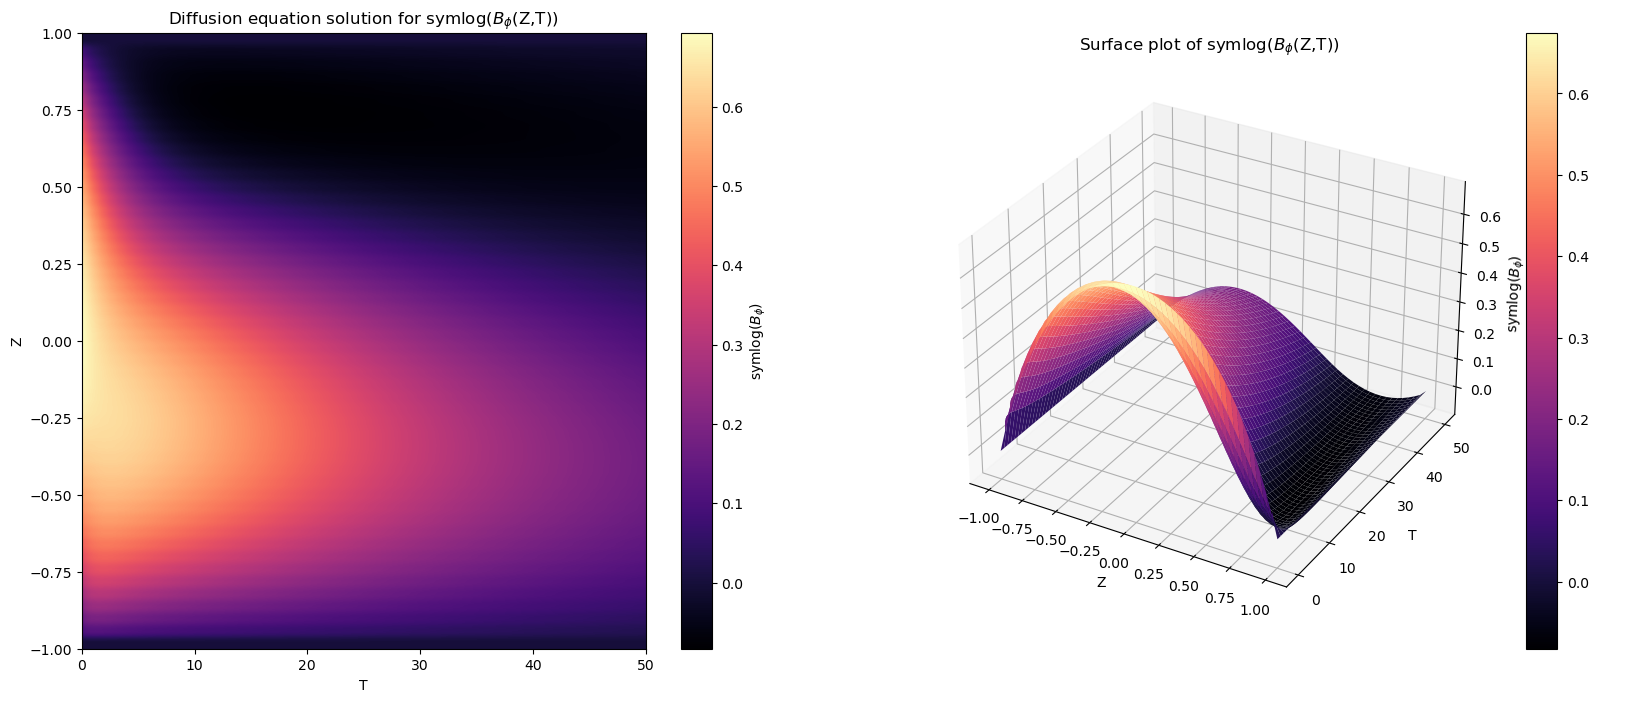

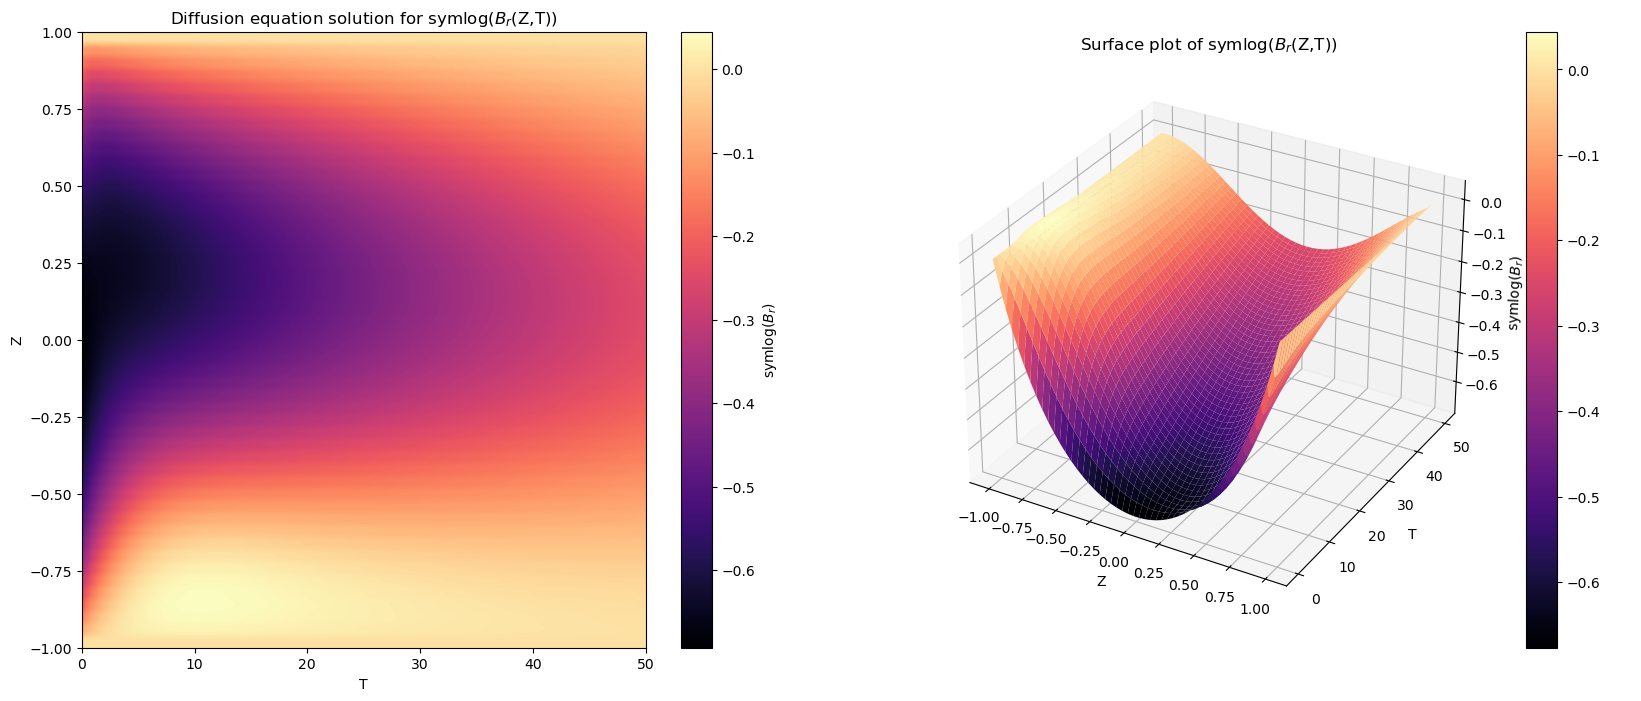

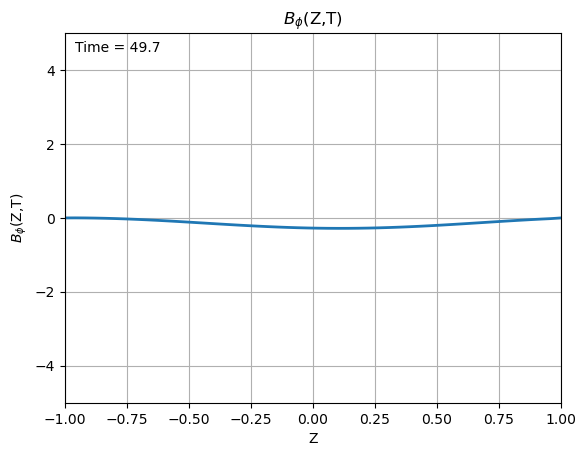

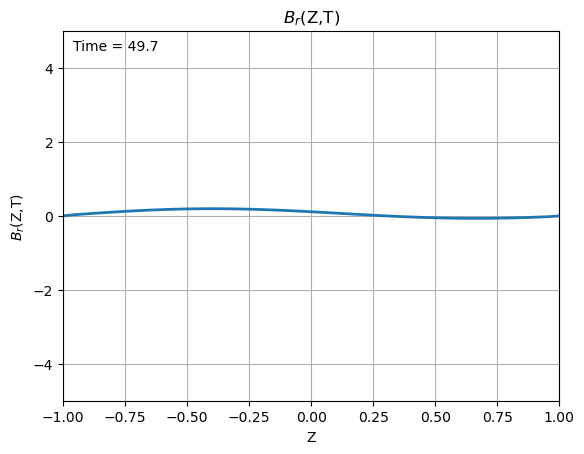

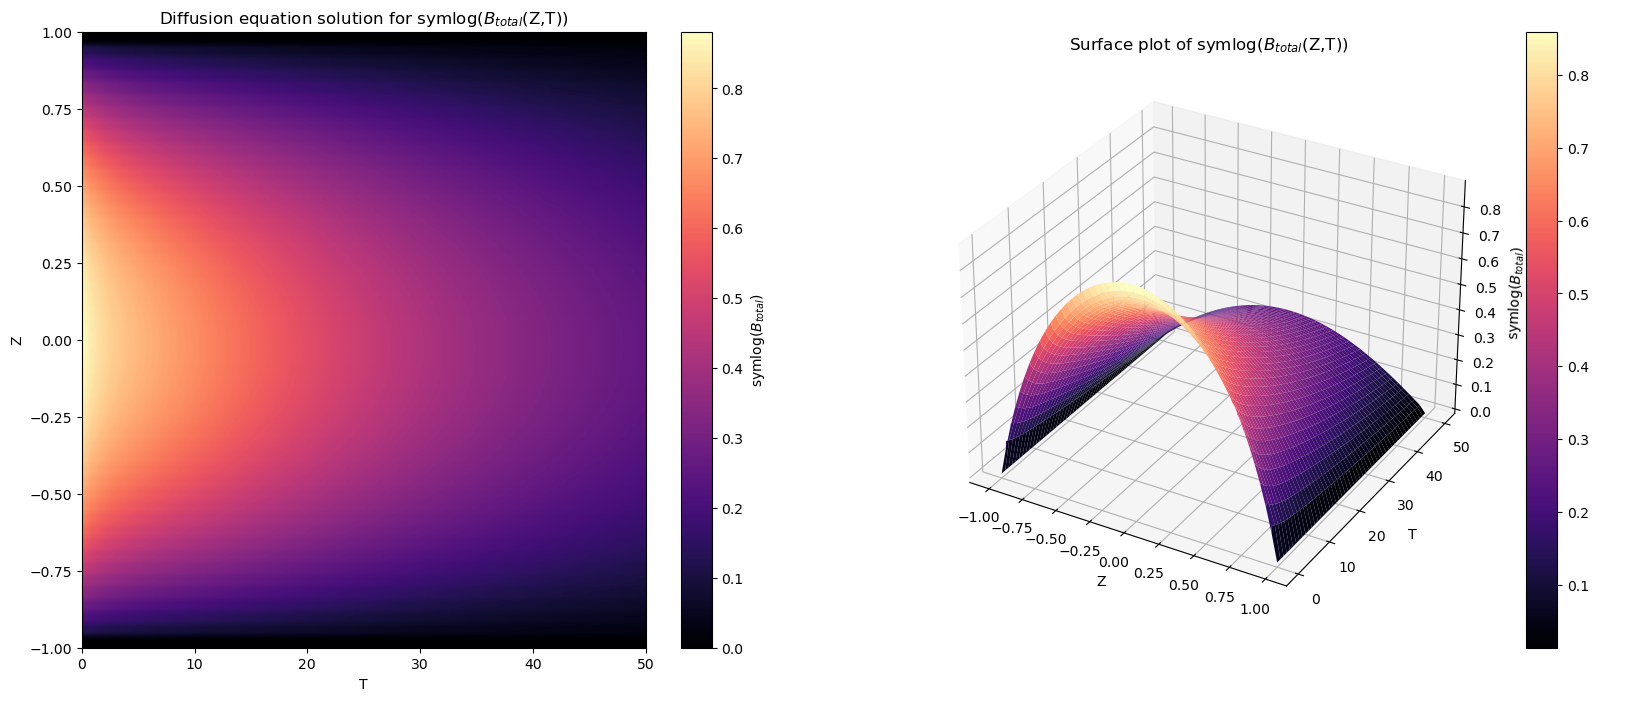

/tmp/ipykernel_31259/3756340362.py:17: RuntimeWarning: invalid value encountered in divide
  pitch_angle = np.degrees(np.arctan(U_r/U_phi))


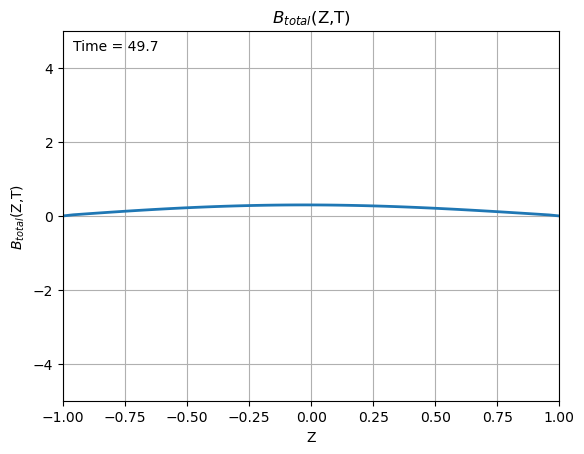

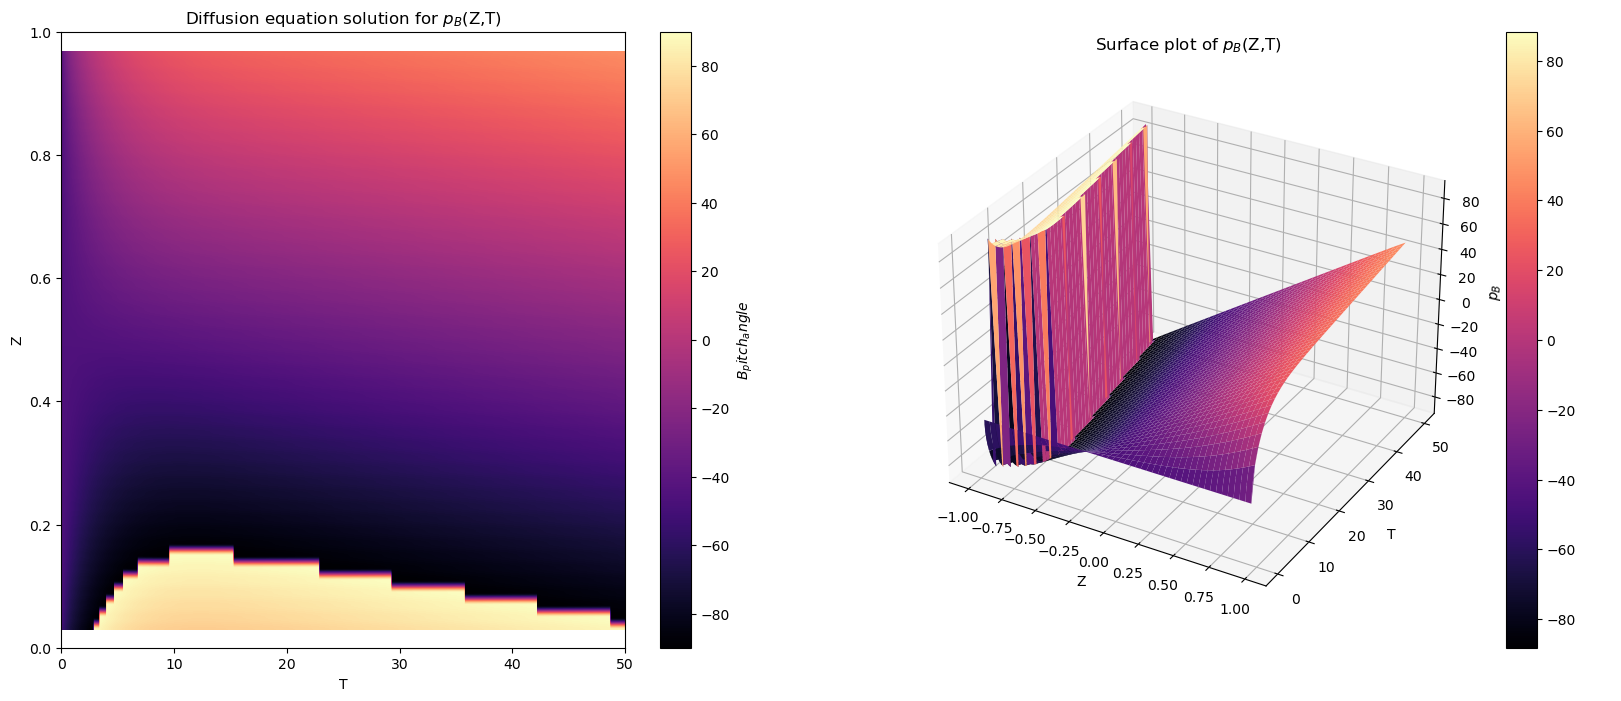

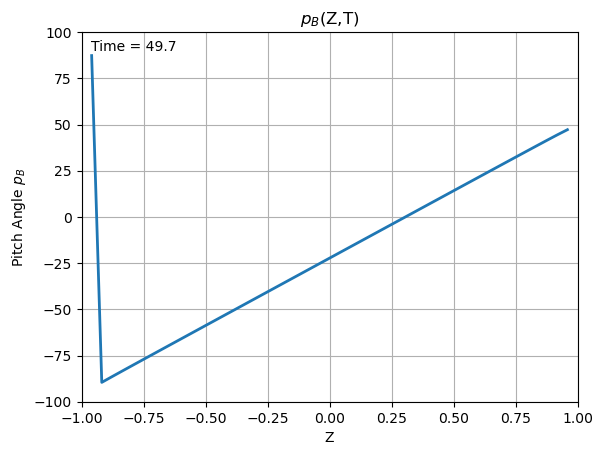

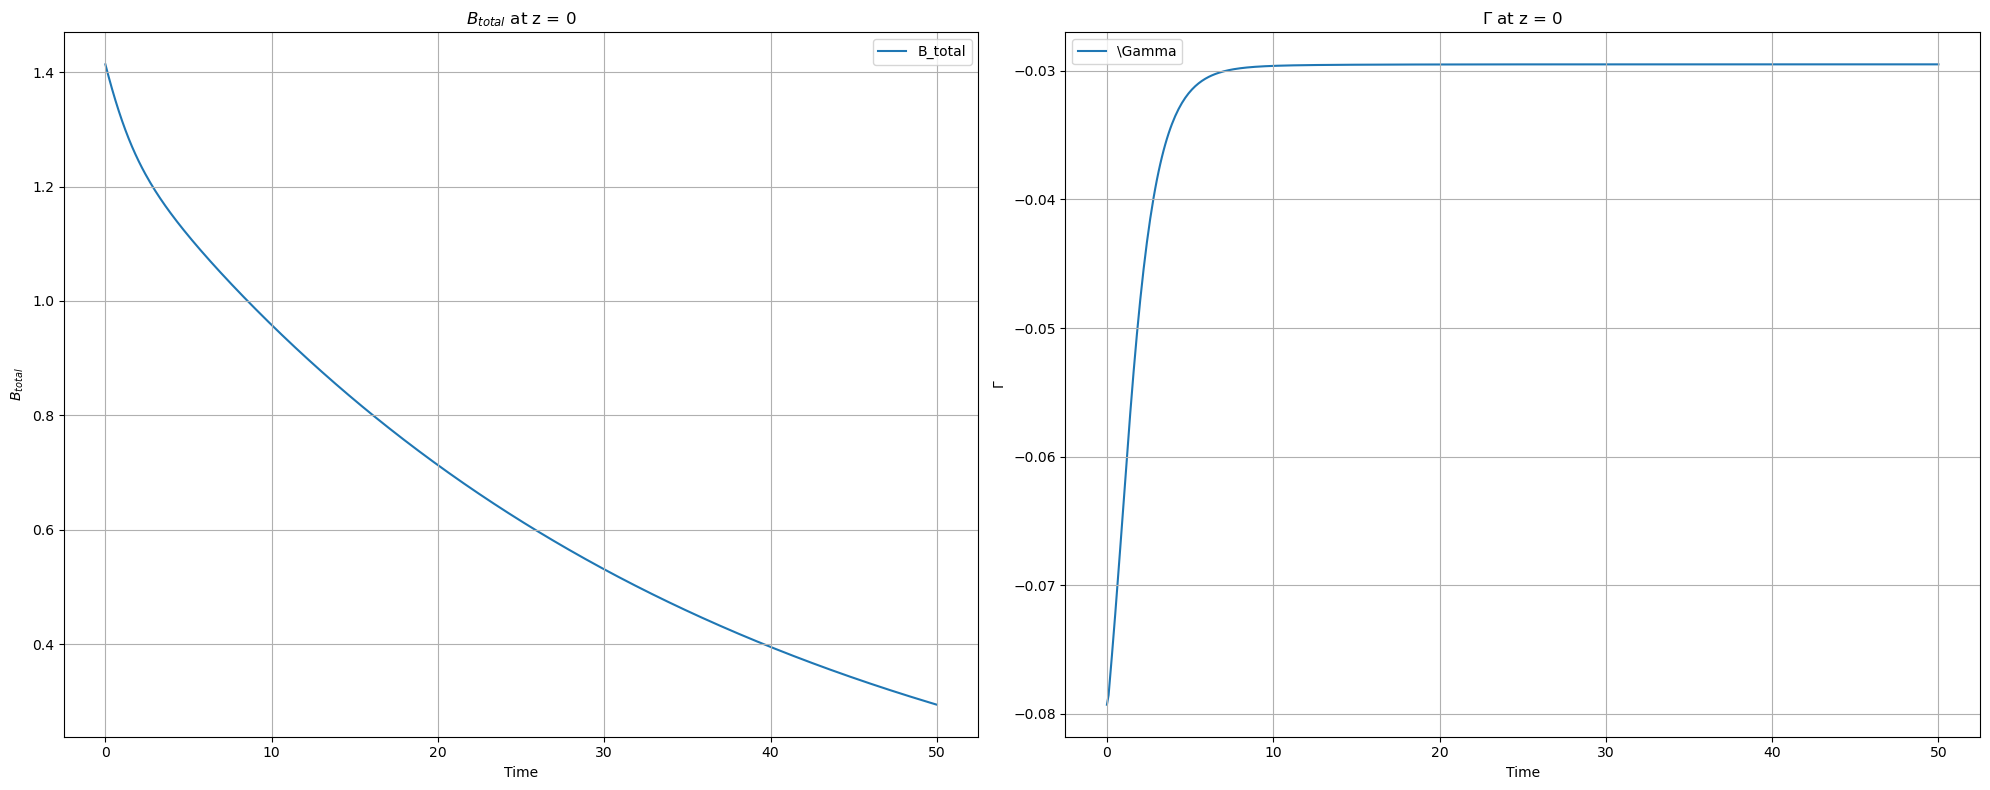

In [11]:
#a2-omega ex2
U, tspan, xspan = crank_nicolson_mod_alpha2_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B_log(U_r, tspan, xspan, T, L, '\phi')
plot_B_log(U_phi, tspan, xspan, T, L, 'r')
plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','2_alpha2_omega')
plot_B_animation(U_r, tspan, xspan, T, L, 'r','2_alpha2_omega')

B_total1 = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B_log(B_total1, tspan, xspan, T, L, '{total}')
plot_B_animation(B_total1, tspan, xspan, T, L, '{total}','2_alpha2_omega')

pitch_angle = np.degrees(np.arctan(U_r/U_phi))
#print(pitch_angle[:,0].shape)
plot_pB(pitch_angle, tspan, xspan, T, L, 'pitch_angle')
plot_pB_animation(pitch_angle, tspan, xspan, T, L, 'pitch_angle', '2_alpha2_omega')


B_mid = B_total1[int(M/2),:]

# Create a figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot B_total
axs[0].plot(tspan, B_mid, label='B_total', zorder = 1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('$B_{total}$')
axs[0].set_title('$B_{total}$ at z = 0')
axs[0].legend()
axs[0].grid(True)  # Add grid

# Calculate decay rate
decay_rate = np.gradient(np.log(B_mid), tspan)

# Plot decay rate
axs[1].plot(tspan, decay_rate, label='\Gamma', zorder = 1)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$\Gamma$')
axs[1].set_title('$\Gamma$ at z = 0')
axs[1].legend()
axs[1].grid(True)  # Add grid

# Display the plot
plt.tight_layout()
plt.show()

Calculating critical Dynamo number...
Critical Dynamo number Dc =  11.5789
Value of alpha at D_c = 12.0684 km/s


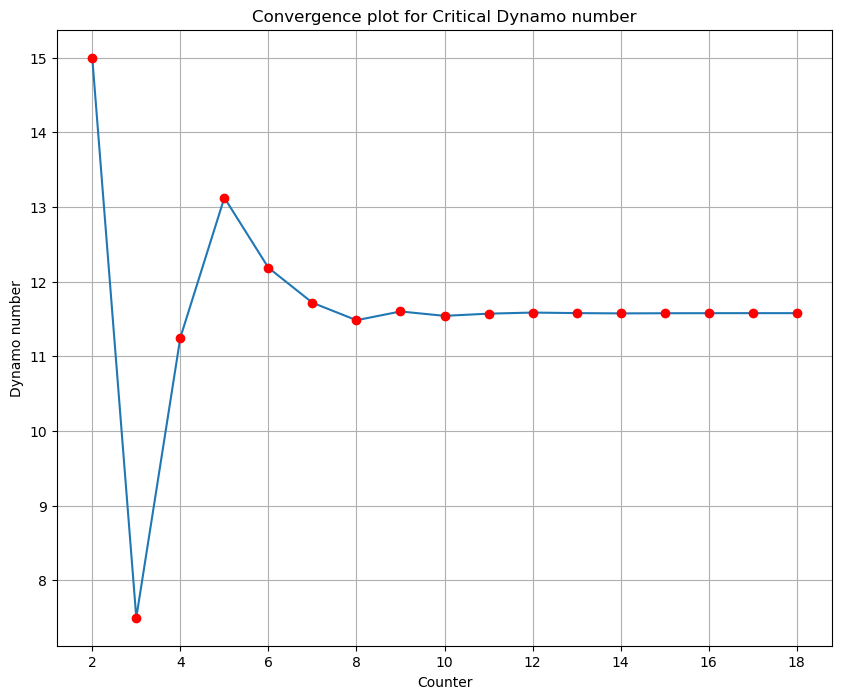

In [12]:
def f(D):
	alpha = D/(q*Omega*1**3/eta_T**2)
	z = np.linspace(-L, L, M)
	# Solve the diffusion equation in radial direction
	U, tspan, xspan = crank_nicolson_mod_alpha2_omega(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

	B_r = U[:len(z), :]
	B_phi = U[len(z):, :]

	B_total = np.sqrt(B_phi**2 + B_r**2)
	B_mid = np.log(B_total[int(M/2),:])

	#decay_rate = get_decay_rate(tspan, B_mid, do_print=False)
	decay_rate = np.gradient(B_mid, tspan)

	return decay_rate[-1]

print('Calculating critical Dynamo number...')
D_c, x_arr, y_arr = bisection(f, 0, 30, eps=1e-6)
print('Critical Dynamo number Dc = ', np.round(D_c, 4))
print('Value of alpha at D_c =', np.round(D_c/(q*Omega*1**3/eta_T**2)/(1e3*MYR/(100*PC)), 4), 'km/s')

plt.figure(figsize=(10, 8))
plt.plot(x_arr, y_arr)
plt.plot(x_arr, y_arr, 'ro')
plt.xlabel('Counter')
plt.ylabel('Dynamo number')
plt.title('Convergence plot for Critical Dynamo number')
plt.grid()

plt.show()